# Problem Solving: Search Based
基于搜索的决策系统，常见应用场景如下：
- 地图线路规划(Map Application)
- 决策系统(Decision System)
- 专家系统(Expert System)

### 根据中国城市信息，实现简易版的导航地图
- 文本形式的城市地理信息
- 解析成 python 数据格式
- 可视化相对位置
- 求得各个城市连接关系
- 根据起始点，求解最优的路径

In [1]:
# 提供城市坐标的文本信息

coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [2]:
# 将原始文本信息解析成 Python 数据格式

import networkx as nx
import re

city_location = {}
for line in coordination_source.split('\n'):
    if line.startswith('//'):
        continue
    if line.strip() == '':
        continue
    city = re.findall("name:'(\w+)'", line)[0]
    x_y = re.findall("Coord:\[(\d+.\d+),\s(\d+.\d+)\]", line)[0]
    x_y = tuple(map(float, x_y))
    city_location[city] = x_y
print(city_location)

{'兰州': (103.73, 36.03), '嘉峪关': (98.17, 39.47), '西宁': (101.74, 36.56), '成都': (104.06, 30.67), '石家庄': (114.48, 38.03), '拉萨': (102.73, 25.04), '贵阳': (106.71, 26.57), '武汉': (114.31, 30.52), '郑州': (113.65, 34.76), '济南': (117.0, 36.65), '南京': (118.78, 32.04), '合肥': (117.27, 31.86), '杭州': (120.19, 30.26), '南昌': (115.89, 28.68), '福州': (119.3, 26.08), '广州': (113.23, 23.16), '长沙': (113.0, 28.21), '沈阳': (123.38, 41.8), '长春': (125.35, 43.88), '哈尔滨': (126.63, 45.75), '太原': (112.53, 37.87), '西安': (108.95, 34.27), '北京': (116.46, 39.92), '上海': (121.48, 31.22), '重庆': (106.54, 29.59), '天津': (117.2, 39.13), '呼和浩特': (111.65, 40.82), '南宁': (108.33, 22.84), '银川': (106.27, 38.47), '乌鲁木齐': (87.68, 43.77), '香港': (114.17, 22.28), '澳门': (113.54, 22.19)}


In [3]:
# 计算两个城市间的地理距离

import math


def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


def get_city_distance(city1, city2):
    return geo_distance(city_location[city1], city_location[city2])


get_city_distance('上海', '杭州')

153.5185697155768

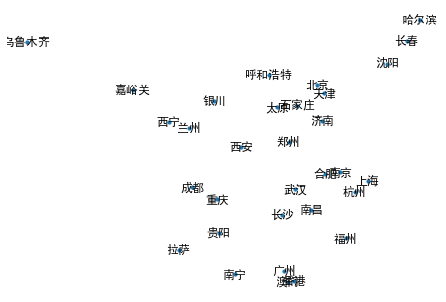

In [5]:
# 作图显示所有城市
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

cities = list(city_location.keys())

city_graph = nx.Graph()
city_graph.add_nodes_from(cities)
nx.draw(city_graph, city_location, with_labels=True, node_size=10)

In [6]:
# 获得特定城市的周边城市

from collections import defaultdict

cities_collection = defaultdict(set)
threshold = 300
for c1 in cities:
    for c2 in cities:
        if c1 == c2:
            continue
        else:
            if get_city_distance(c1, c2) < threshold:
                cities_collection[c1].add(c2)
                cities_collection[c2].add(c1)
 
# # 简化代码
# from itertools import permutations
# c_collection = defaultdict(list)
# for c1, c2 in permutations(cities, 2):
#     if get_city_distance(c1, c2) < threshold:
#         c_collection[c1].append(c2)
        
cities_collection                

defaultdict(set,
            {'兰州': {'成都', '西宁', '银川'},
             '西宁': {'兰州', '成都', '拉萨'},
             '成都': {'兰州', '拉萨', '西宁', '重庆'},
             '银川': {'兰州', '重庆'},
             '拉萨': {'成都', '西宁'},
             '重庆': {'成都', '贵阳', '银川'},
             '石家庄': {'北京', '太原', '济南', '郑州'},
             '郑州': {'太原', '武汉', '石家庄', '长沙'},
             '济南': {'北京', '合肥', '天津', '石家庄'},
             '太原': {'呼和浩特', '石家庄', '郑州'},
             '北京': {'天津', '济南', '石家庄'},
             '贵阳': {'南宁', '重庆'},
             '南宁': {'贵阳'},
             '武汉': {'南昌', '郑州', '长沙'},
             '南昌': {'合肥', '武汉'},
             '长沙': {'广州', '武汉', '澳门', '郑州', '香港'},
             '合肥': {'南京', '南昌', '济南'},
             '天津': {'北京', '济南'},
             '南京': {'合肥', '杭州'},
             '杭州': {'上海', '南京', '福州'},
             '福州': {'杭州'},
             '上海': {'杭州'},
             '广州': {'澳门', '长沙', '香港'},
             '香港': {'广州', '澳门', '长沙'},
             '澳门': {'广州', '长沙', '香港'},
             '沈阳': {'长春'},
          

In [7]:
cities_collection['武汉']

{'南昌', '郑州', '长沙'}

D:\Program\Anaconda3\envs\nlp\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


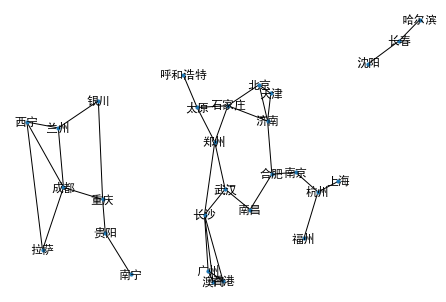

In [8]:
# 根据距离 300km 实现的城市连通图

cities_connection_graph = nx.Graph(cities_collection)
nx.draw(cities_connection_graph, city_location, with_labels=True, node_size=10)

In [17]:
# 根据联通图、起点及终点城市、乘车策略，获取路径


def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]

    visitied = set()
    while pathes:
        path = pathes.pop(0)

        froninter = path[-1]
        if froninter in visitied:
            continue

        successors = connection_grpah[froninter]
        for city in successors:
            if city in path:
                continue

            new_path = path + [city]
            pathes.append(new_path)

            if city == destination:
                return new_path

        visitied.add(froninter)
        pathes = sort_candidate(pathes)


def transfer_stations_first(pathes):
    # 最少转乘策略
    return sorted(pathes, key=len)


def transfer_as_much_possible(pathes):
    # 最多转乘
    return sorted(pathes, key=len, reverse=True)


def shortest_path_first(pathes):
    # 最短乘车里程
    if len(pathes) <= 1:
        return pathes

    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_city_distance(station, path[-1])
        return distance

    return sorted(pathes, key=get_path_distnace)

In [19]:
search('兰州', '福州', simple_connection_info, sort_candidate=shortest_path_first)

['兰州', '西安', '长沙', '福州']

In [21]:
def pprint(path):
    print('-->'.join(path))

In [22]:
pprint(
    search('北京',
           '广州',
           cities_collection,
           sort_candidate=transfer_stations_first))

北京-->石家庄-->郑州-->长沙-->广州


In [23]:
pprint(
    search('北京',
           '广州',
           cities_collection,
           sort_candidate=transfer_as_much_possible))

北京-->济南-->石家庄-->郑州-->长沙-->广州


### 爬取武汉地铁信息，实现简单的地铁换乘图

#### 获取地铁线路 URL

In [9]:
import re
from collections import defaultdict
import bs4
import requests
from requests.compat import urljoin

In [2]:
url = r'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A'
headers = {
    'user-agent':
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:67.0) Gecko/20100101 Firefox/67.0'
}

In [5]:
def get_line_urls(url, name='武汉轨道交通'):
    r = requests.get(url, headers=headers)
    r.encoding = 'utf-8'

    s = bs4.BeautifulSoup(r.text)

    url_map = {}
    for link in s.find_all('a'):
        line_name = link.string
        if line_name and line_name.startswith(name):
            try:
                href = link.get('href')
                url = urljoin('https://baike.baidu.com/', href)
                url_map[line_name] = url
            except:
                pass
    return url_map


url_map = get_line_urls(url)

url_map

{'武汉轨道交通1号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A1%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通2号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A2%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通6号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A6%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通7号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A7%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通纸坊线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A%E7%BA%B8%E5%9D%8A%E7%BA%BF/22306180',
 '武汉轨道交通19号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A19%E5%8F%B7%E7%BA%BF/22306183',
 '武汉轨道交通3号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A3%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通4号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A4%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通8号线'

#### 获取每条线路URL信息并保存

In [7]:
available = ['1号线', '2号线', '3号线', '4号线', '6号线', '7号线', '8号线', '11号线', '阳逻线']
line_url = {k: v for k, v in url_map.items() if k[6:] in available}

line_url

{'武汉轨道交通1号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A1%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通2号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A2%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通6号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A6%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通7号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A7%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通3号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A3%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通4号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A4%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通8号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A8%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通11号线': 'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A11%E5%8F%B7%E7%BA%BF',
 '武汉轨道交通阳逻线': 'https://baike.baidu.com

In [11]:
for name, url in line_url.items():
    r = requests.get(url, headers=headers)
    r.encoding = 'utf-8'
    filename = name + '.txt'
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(r.text)

In [2]:
line_url = {
    '武汉轨道交通1号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A1%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通2号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A2%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通6号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A6%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通7号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A7%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通3号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A3%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通4号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A4%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通8号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A8%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通11号线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A11%E5%8F%B7%E7%BA%BF',
    '武汉轨道交通阳逻线':
    'https://baike.baidu.com/item/%E6%AD%A6%E6%B1%89%E8%BD%A8%E9%81%93%E4%BA%A4%E9%80%9A%E9%98%B3%E9%80%BB%E7%BA%BF'
}

### 查找站名所在的列

In [12]:
text1 = '<tr><td width="131" valign="top">站名</td><td width="195" valign="top">所在区域</td><td width="153" valign="top">换乘线路</td><td width="180" valign="top">开通时间</td></tr>'
text2 = '<tr><td><div class="para" label-module="para">序号</div></td><td><div class="para" label-module="para">车站名称</div></td><td><div class="para" label-module="para">中心里程</div></td><td><div class="para" label-module="para">右线站间距（m）</div></td><td><div class="para" label-module="para">站 型</div></td><td width="134" height="38">换乘线路</td></tr>'
text3 = '<tr></tr>'

In [14]:
s1 = bs4.BeautifulSoup(text1).tr
s2 = bs4.BeautifulSoup(text2).tr
s3 = bs4.BeautifulSoup(text3).tr

type(s1)

bs4.element.Tag

In [15]:
for s in s1.children:
    print(type(s))
    print(s)

<class 'bs4.element.Tag'>
<td valign="top" width="131">站名</td>
<class 'bs4.element.Tag'>
<td valign="top" width="195">所在区域</td>
<class 'bs4.element.Tag'>
<td valign="top" width="153">换乘线路</td>
<class 'bs4.element.Tag'>
<td valign="top" width="180">开通时间</td>


In [3]:
def find_station_col(header):
    cols = header.children
    if cols is None: return
    for i, col in enumerate(cols):
        if '站名' in str(col):
            return i

In [17]:
find_station_col(s1)

0

In [18]:
find_station_col(s2)

1

In [19]:
find_station_col(s3)

#### 从表中获取站名列表

In [4]:
def find_station(row, station_col):
    cols = list(row.children)
    try:
        s = cols[station_col]
        pat = re.compile('>([^<>]+)<')
        match = pat.search(str(s))
        return match.group(1)
    except:
        return None

In [5]:
def find_stations(table):
    stations = []
    rows = table.find_all('tr')
    header = rows[0]
    station_col = find_station_col(header)
    if station_col is not None:
        for row in rows[1:]:
            station = find_station(row, station_col)
            if station:
                stations.append(station)
    return stations

#### 多个表中获取站名列表

In [6]:
def complete_stations(tables):
    return max([find_stations(table) for table in tables], key=len)

### 从保存的文件中获取站名列表

In [7]:
def get_stations(filename):
    r = open(filename, 'r', encoding='utf-8')
    s = bs4.BeautifulSoup(r)
    r.close()
    tables = s.find_all('table')
    if tables:
        return complete_stations(tables)

In [24]:
stations = get_stations('武汉轨道交通阳逻线.txt')
stations

['起点',
 '后湖大道站',
 '百步亭花园',
 '新荣站',
 '黄埔新城',
 '谌家矶',
 '武湖',
 '高车[6]站',
 '武湖',
 '沙口站',
 '军民村站',
 '武生院站',
 '平江路站',
 '阳逻开发区',
 '施岗站',
 '金台站',
 '终点']

In [8]:
line_stations = defaultdict(list)

for name in line_url:
    stations = get_stations(name + '.txt')
    line_stations[name] = stations

In [9]:
line_stations

defaultdict(list,
            {'武汉轨道交通1号线': ['径河站',
              '三店站',
              '码头潭公园站',
              '东吴大道站',
              '五环大道站',
              '额头湾站',
              '竹叶海站',
              '舵落口站',
              '古田一路站',
              '古田二路站',
              '古田三路站',
              '古田四路站',
              '汉西一路站',
              '宗关站',
              '太平洋站',
              '硚口路站',
              '崇仁路站',
              '利济北路站',
              '友谊路站',
              '循礼门站',
              '大智路站',
              '三阳路站',
              '黄浦路站',
              '头道街站',
              '二七路站',
              '徐州新村站',
              '丹水池站',
              '新荣站',
              '堤角站',
              '滕子岗站',
              '滠口新城站',
              '汉口北站'],
             '武汉轨道交通2号线': ['天河机场站',
              '航空总部站',
              '宋家岗站',
              '巨龙大道站',
              '盘龙城站',
              '宏图大道站',
              '常青城站',
              '金银潭站',
              '常青花园站',
              '长港路站',
              '汉口火车

#### 缺失数据
- 11号线为空，url对应的网页无站点内容

In [30]:
url = 'https://baike.baidu.com/item/武汉地铁11号线'

r = requests.get(url, headers=headers)
r.encoding = 'utf-8'
filename = '武汉轨道交通11号线' + '.txt'
with open(filename, 'w', encoding='utf-8') as f:
    f.write(r.text)

stations = get_stations('武汉轨道交通11号线.txt')

stations

['中法生态城站',
 '黄金口站',
 '新汉阳火车站',
 '龙阳湖南站',
 '四新大道站',
 '芳草路站',
 '四新中心站',
 '国博中心北站',
 '张家湾站',
 '江安路站',
 '复兴路站',
 '武昌火车站',
 '丁字桥站',
 '马房山站',
 '虎泉站',
 '体育学院站',
 '光谷广场站',
 '关山大道站',
 '光谷火车站',
 '湖口站',
 '光谷同济医院站',
 '光谷生物园站',
 '光谷四路站',
 '光谷五路站',
 '光谷六路站',
 '豹澥路站',
 '光谷七路站',
 '长岭山站',
 '未来一路站',
 '未来三路站',
 '左岭站',
 '葛店南站']

In [11]:
line_stations['武汉轨道交通阳逻线'].remove('起点')
line_stations['武汉轨道交通阳逻线'].remove('终点')

line_stations

defaultdict(list,
            {'武汉轨道交通1号线': ['径河站',
              '三店站',
              '码头潭公园站',
              '东吴大道站',
              '五环大道站',
              '额头湾站',
              '竹叶海站',
              '舵落口站',
              '古田一路站',
              '古田二路站',
              '古田三路站',
              '古田四路站',
              '汉西一路站',
              '宗关站',
              '太平洋站',
              '硚口路站',
              '崇仁路站',
              '利济北路站',
              '友谊路站',
              '循礼门站',
              '大智路站',
              '三阳路站',
              '黄浦路站',
              '头道街站',
              '二七路站',
              '徐州新村站',
              '丹水池站',
              '新荣站',
              '堤角站',
              '滕子岗站',
              '滠口新城站',
              '汉口北站'],
             '武汉轨道交通2号线': ['天河机场站',
              '航空总部站',
              '宋家岗站',
              '巨龙大道站',
              '盘龙城站',
              '宏图大道站',
              '常青城站',
              '金银潭站',
              '常青花园站',
              '长港路站',
              '汉口火车

#### 获取每个站点的下一站点

In [14]:
def overlapping_pairs(items):
    return [items[i:i + 2] for i in range(len(items) - 1)]


def next_station(line_stations):
    next = defaultdict(set)
    for name, stations in line_stations.items():
        for a, b in overlapping_pairs(stations):
            next[a].add(b)
            next[b].add(a)
    return next


nexts = next_station(line_stations)
nexts

defaultdict(set,
            {'径河站': {'三店站'},
             '三店站': {'径河站', '码头潭公园站'},
             '码头潭公园站': {'三店站', '东吴大道站', '临空港大道站', '新城十二路站'},
             '东吴大道站': {'五环大道站', '码头潭公园站'},
             '五环大道站': {'东吴大道站', '额头湾站'},
             '额头湾站': {'五环大道站', '竹叶海站'},
             '竹叶海站': {'舵落口站', '额头湾站'},
             '舵落口站': {'古田一路站', '竹叶海站'},
             '古田一路站': {'古田二路站', '舵落口站'},
             '古田二路站': {'古田一路站', '古田三路站'},
             '古田三路站': {'古田二路站', '古田四路站'},
             '古田四路站': {'古田三路站', '汉西一路站'},
             '汉西一路站': {'古田四路站', '宗关站'},
             '宗关站': {'双墩站', '太平洋站', '汉西一路站', '王家湾站'},
             '太平洋站': {'宗关站', '硚口路站'},
             '硚口路站': {'太平洋站', '崇仁路站'},
             '崇仁路站': {'利济北路站', '硚口路站'},
             '利济北路站': {'友谊路站', '崇仁路站'},
             '友谊路站': {'利济北路站', '循礼门站'},
             '循礼门站': {'中山公园站', '友谊路站', '大智路站', '江汉路站'},
             '大智路站': {'三阳路站', '循礼门站', '江汉路站', '苗栗路站'},
             '三阳路站': {'大智路站', '徐家棚站', '香港路站', '黄浦路站'},
             '黄浦路站': {'三阳路站

#### 获取两个站点间的路线

In [26]:
def search(start, end):
    explored = set()
    frontier = [[start]]
    while frontier:
        path = frontier.pop(0)
        s = path[-1]
        for next in nexts[s]:
            if next not in explored:
                explored.add(next)
                path2 = path + [next]
                if next == end:
                    return '-->'.join(path2)
                else:
                    frontier.append(path2)

    return []


pathes = search('光谷火车站站', '华中科技大学站')
pathes

'光谷火车站站-->佳园路站-->光谷大道站-->华中科技大学站'

#### 利用高德地图获得地铁线路 JSON 数据

In [7]:
import json
from collections import defaultdict

In [ ]:
# url = 'http://map.amap.com/service/subway?_1562678939752&srhdata=4201_drw_wuhan.json'

# with open('subway.json', 'w', encoding='utf-8') as f:
#     r = requests.get(url)
#     json.dump(r.json(), f, indent=4)

In [13]:
# data_dir = 'datasets/wuhan_subway/subway.json'
with open('subway.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

data['l']

[{'f': [{'li': '420100034364',
    'c': ['56 131',
     '56 196',
     '56 273',
     '56 329',
     '56 365',
     '57 369',
     '61 372',
     '86 386',
     '124 408',
     '158 427',
     '196 449',
     '258 484',
     '300 508',
     '342 531',
     '386 556',
     '428 580',
     '465 601',
     '486 613',
     '491 615',
     '497 617',
     '506 617',
     '550 617',
     '605 617',
     '673 617',
     '682 616',
     '689 614',
     '694 610',
     '708 596',
     '739 563',
     '774 527',
     '824 476',
     '877 421',
     '914 384',
     '950 347',
     '985 311',
     '1021 275',
     '1056 239',
     '1078 216',
     '1110 184',
     '1151 142',
     '1192 100',
     '1233 58']},
   {'li': '420100034365',
    'c': ['1230 55',
     '1189 97',
     '1148 139',
     '1107 181',
     '1075 213',
     '1053 236',
     '1018 272',
     '982 308',
     '947 344',
     '911 380',
     '874 418',
     '821 473',
     '771 524',
     '736 560',
     '705 593',
     '691 607',


In [15]:
line_stops = defaultdict(list)
for line in data['l']:
    full_name = line['kn']
    name = line['ln']
    stops_info = line['st']
    for stop_info in stops_info:
        stop = stop_info['n']
        long, lat = map(float, stop_info['sl'].split(','))
        line_stops[(full_name, name)].append((stop, (long, lat)))

import pprint
pprint.pprint(line_stops)

defaultdict(<class 'list'>,
            {('轨道交通11号线', '11号线'): [('光谷火车站', (114.431755, 30.486956)),
                                    ('湖口', (114.447126, 30.488345)),
                                    ('光谷同济医院', (114.466409, 30.485267)),
                                    ('光谷生物园', (114.481231, 30.48761)),
                                    ('光谷四路', (114.492018, 30.489155)),
                                    ('光谷五路', (114.50296, 30.485103)),
                                    ('光谷六路', (114.512862, 30.485028)),
                                    ('豹澥', (114.522905, 30.488736)),
                                    ('光谷七路', (114.534098, 30.488447)),
                                    ('长岭山', (114.563156, 30.487628)),
                                    ('未来一路', (114.585145, 30.484577)),
                                    ('未来三路', (114.605998, 30.48645)),
                                    ('左岭', (114.620698, 30.487667))],
             ('轨道交通1号线', '1号线'): [('汉口北', (114.329481,

In [17]:
stop_location = {}
for s in line_stops.values():
    for stop, location in s:
        stop_location[stop] = location

stop_location

{'汉口北': (114.329481, 30.711953),
 '滠口新城': (114.342372, 30.684553),
 '滕子岗': (114.341474, 30.674527),
 '堤角': (114.338273, 30.665863),
 '新荣': (114.334533, 30.655893),
 '丹水池': (114.330017, 30.643386),
 '徐州新村': (114.322936, 30.631171),
 '二七路': (114.318749, 30.625032),
 '头道街': (114.313923, 30.617818),
 '黄浦路': (114.308156, 30.608404),
 '三阳路': (114.301348, 30.598718),
 '大智路': (114.295038, 30.592581),
 '循礼门': (114.285992, 30.585234),
 '友谊路': (114.278415, 30.580865),
 '利济北路': (114.270119, 30.577433),
 '崇仁路': (114.261901, 30.573909),
 '硚口路': (114.250444, 30.571547),
 '太平洋': (114.240741, 30.574025),
 '宗关': (114.224975, 30.580306),
 '汉西一路': (114.218822, 30.585491),
 '古田四路': (114.211532, 30.589347),
 '古田三路': (114.20474, 30.593382),
 '古田二路': (114.196667, 30.597536),
 '古田一路': (114.183062, 30.604521),
 '舵落口': (114.169464, 30.609907),
 '竹叶海': (114.163868, 30.615064),
 '额头湾': (114.155941, 30.61846),
 '五环大道': (114.138907, 30.617699),
 '东吴大道': (114.128567, 30.624968),
 '码头潭公园': (114.123644, 30.631684),
 '三

In [19]:
import networkx as nx
stop_graph = nx.Graph()

stop_graph.add_nodes_from(list(stop_location.keys()))

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30.0, 20.0)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

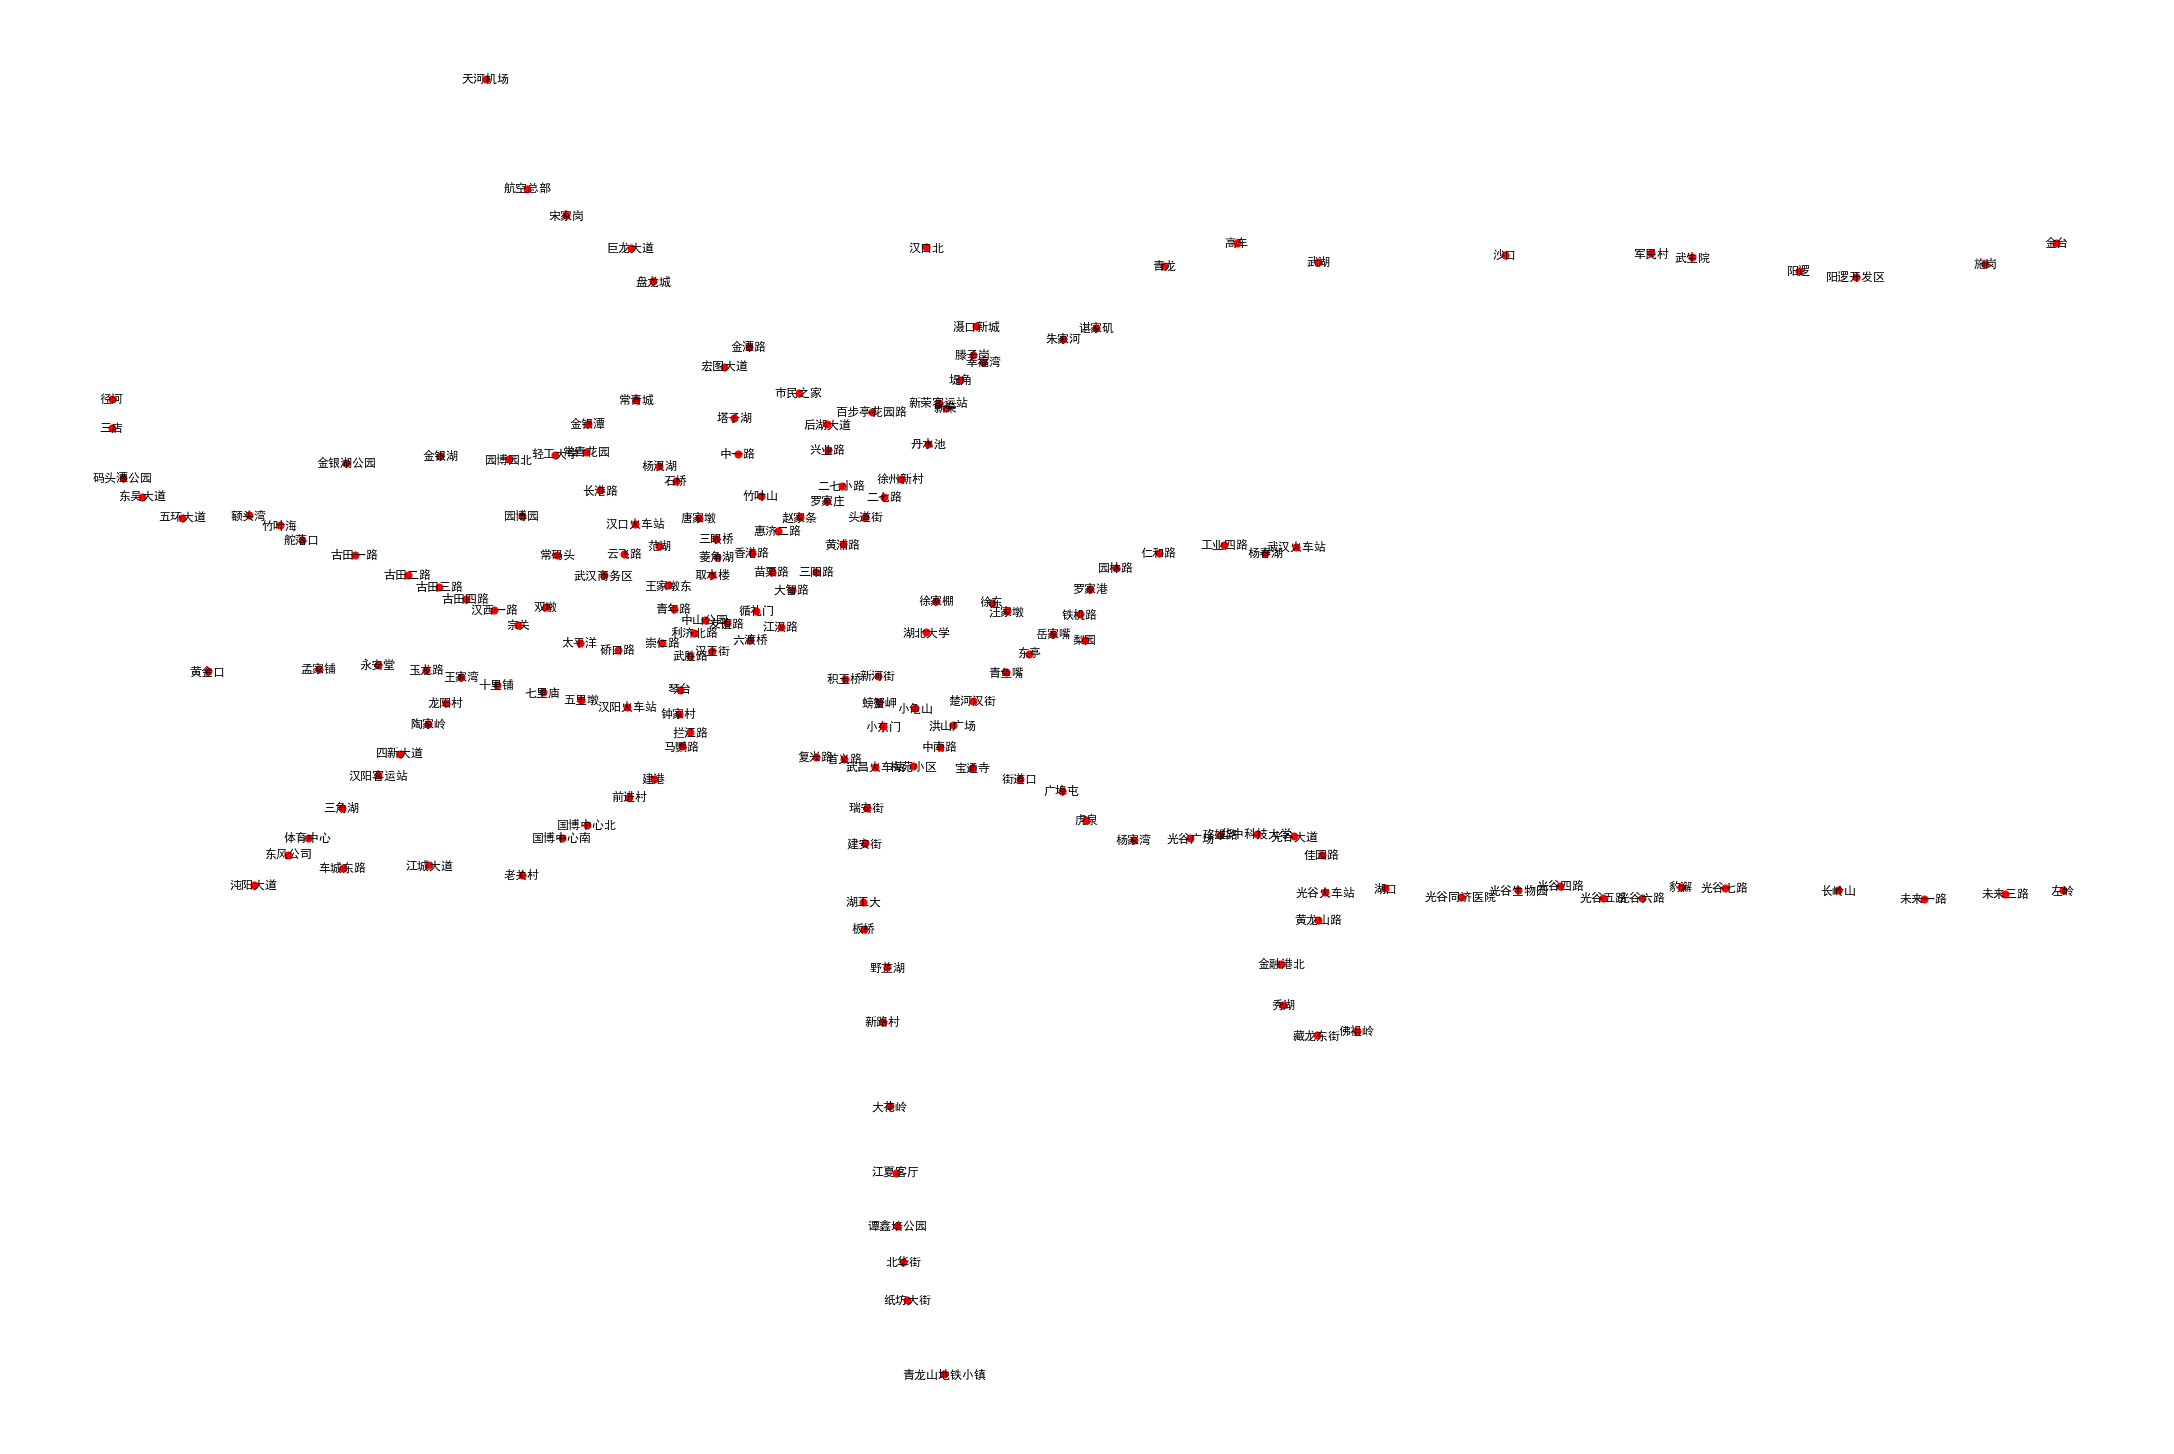

In [22]:
nx.draw(stop_graph,
        stop_location,
        with_labels=True,
        node_size=50,
        font_size=12,
        node_color='red')

In [25]:
line_stops_info = {
    k[0]: list([i[0] for i in v])
    for k, v in line_stops.items()
}
line_stops_info

{'轨道交通1号线': ['汉口北',
  '滠口新城',
  '滕子岗',
  '堤角',
  '新荣',
  '丹水池',
  '徐州新村',
  '二七路',
  '头道街',
  '黄浦路',
  '三阳路',
  '大智路',
  '循礼门',
  '友谊路',
  '利济北路',
  '崇仁路',
  '硚口路',
  '太平洋',
  '宗关',
  '汉西一路',
  '古田四路',
  '古田三路',
  '古田二路',
  '古田一路',
  '舵落口',
  '竹叶海',
  '额头湾',
  '五环大道',
  '东吴大道',
  '码头潭公园',
  '三店',
  '径河'],
 '轨道交通2号线': ['佛祖岭',
  '藏龙东街',
  '秀湖',
  '金融港北',
  '黄龙山路',
  '光谷火车站',
  '佳园路',
  '光谷大道',
  '华中科技大学',
  '珞雄路',
  '光谷广场',
  '杨家湾',
  '虎泉',
  '广埠屯',
  '街道口',
  '宝通寺',
  '中南路',
  '洪山广场',
  '小龟山',
  '螃蟹岬',
  '积玉桥',
  '江汉路',
  '循礼门',
  '中山公园',
  '青年路',
  '王家墩东',
  '范湖',
  '汉口火车站',
  '长港路',
  '常青花园',
  '金银潭',
  '常青城',
  '宏图大道',
  '盘龙城',
  '巨龙大道',
  '宋家岗',
  '航空总部',
  '天河机场'],
 '轨道交通3号线': ['沌阳大道',
  '东风公司',
  '体育中心',
  '三角湖',
  '汉阳客运站',
  '四新大道',
  '陶家岭',
  '龙阳村',
  '王家湾',
  '宗关',
  '双墩',
  '武汉商务区',
  '云飞路',
  '范湖',
  '菱角湖',
  '香港路',
  '惠济二路',
  '赵家条',
  '罗家庄',
  '二七小路',
  '兴业路',
  '后湖大道',
  '市民之家',
  '宏图大道'],
 '轨道交通4号线': ['黄金口',
  '孟家铺',
  '永安堂',
  '玉龙路',
  '王家湾',
  '十里铺',
  '七里庙',
  '五里墩',
 

In [28]:
def overlapping_pairs(items):
    return [items[i:i + 2] for i in range(len(items) - 1)]


def nexts(line_stops_info):
    next_stops = defaultdict(set)
    for name, stops in line_stops_info.items():
        for a, b in overlapping_pairs(stops):
            next_stops[a].add(b)
            next_stops[b].add(a)
    return next_stops


next_stops = nexts(line_stops_info)
next_stops

defaultdict(set,
            {'汉口北': {'滠口新城'},
             '滠口新城': {'汉口北', '滕子岗'},
             '滕子岗': {'堤角', '滠口新城'},
             '堤角': {'新荣', '滕子岗'},
             '新荣': {'丹水池', '堤角'},
             '丹水池': {'徐州新村', '新荣'},
             '徐州新村': {'丹水池', '二七路'},
             '二七路': {'头道街', '徐州新村'},
             '头道街': {'二七路', '黄浦路'},
             '黄浦路': {'三阳路', '头道街', '徐家棚', '赵家条'},
             '三阳路': {'大智路', '徐家棚', '香港路', '黄浦路'},
             '大智路': {'三阳路', '循礼门', '江汉路', '苗栗路'},
             '循礼门': {'中山公园', '友谊路', '大智路', '江汉路'},
             '友谊路': {'利济北路', '循礼门'},
             '利济北路': {'友谊路', '崇仁路'},
             '崇仁路': {'利济北路', '硚口路'},
             '硚口路': {'太平洋', '崇仁路'},
             '太平洋': {'宗关', '硚口路'},
             '宗关': {'双墩', '太平洋', '汉西一路', '王家湾'},
             '汉西一路': {'古田四路', '宗关'},
             '古田四路': {'古田三路', '汉西一路'},
             '古田三路': {'古田二路', '古田四路'},
             '古田二路': {'古田一路', '古田三路'},
             '古田一路': {'古田二路', '舵落口'},
             '舵落口': {'古田一路', '竹叶海'},
     

In [30]:
def search(start, end):
    explored = set()
    frontier = [[start]]
    while frontier:
        path = frontier.pop(0)
        s = path[-1]
        for next in next_stops[s]:
            if next not in explored:
                explored.add(next)
                path2 = path + [next]
                if next == end:
                    return '-->'.join(path2)
                else:
                    frontier.append(path2)

    return []


path = search('沙口', '光谷七路')
path

'沙口-->武湖-->高车-->青龙-->谌家矶-->朱家河-->幸福湾-->新荣客运站-->百步亭花园路-->后湖大道-->兴业路-->二七小路-->罗家庄-->赵家条-->黄浦路-->徐家棚-->湖北大学-->新河街-->螃蟹岬-->小龟山-->洪山广场-->中南路-->宝通寺-->街道口-->广埠屯-->虎泉-->杨家湾-->光谷广场-->珞雄路-->华中科技大学-->光谷大道-->佳园路-->光谷火车站-->湖口-->光谷同济医院-->光谷生物园-->光谷四路-->光谷五路-->光谷六路-->豹澥-->光谷七路'

#### 路线规划的不同策略

In [31]:
def minimum_transfer_priority(pathes):
    return min(pathes, key=len)

In [40]:
import math


def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d


def get_geo_distance(stop1, stop2):
    return geo_distance(stop_location[stop1], stop_location[stop2])


def shortest_path_priority(pathes):
    def path_distance(path):
        return sum(
            get_geo_distance(stop1, stop2)
            for stop1, stop2 in overlapping_pairs(path))

    return min(pathes, key=path_distance)

In [34]:
def comprehensive_priority(pathes):
    return pathes[0]

In [115]:
# 代码有问题，并没有获得全部路径
def search(start, destination, strategy):
    pathes = []
    explored = set()
    frontier = [[start]]
    while frontier:
        path = frontier.pop(0)
        s = path[-1]
        for next in next_stops[s]:
            if next not in explored:
                # explored.add(next) 如果此时将目的地加入 explored，其它可能的路径都被忽略了
                path2 = path + [next]
                if next == destination:
                    pathes.append(path2)
                else:
                    frontier.append(path2)
        explored.add(s)
    return strategy(pathes)

In [116]:
search('宗关', '螃蟹岬', strategy=comprehensive_priority)

['宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬']

In [117]:
search('宗关', '螃蟹岬', strategy=minimum_transfer_priority)

['宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬']

In [118]:
search('宗关', '螃蟹岬', strategy=shortest_path_priority)

['宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬']

In [119]:
from itertools import combinations


def test_strategy():
    i, j = 0, 0
    for start, destination in combinations(next_stops.keys(), 2):
        minimum_transfer_path = search(start, destination,
                                       minimum_transfer_priority)
        shortest_path = search(start, destination, shortest_path_priority)
        if shortest_path == minimum_transfer_path:
            i += 1
        else:
            j += 1
            print('起点：%s； 终点：%s' % (start, destination))
            print('最少换乘方案：', minimum_transfer_path)
            print('最短路程方案：', shortest_path)
    print('两种方案结果相同的概率', i / (i + j))

In [120]:
test_strategy()

起点：汉口北； 终点：太平洋
最少换乘方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '太平洋']
最短路程方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋']
起点：汉口北； 终点：宗关
最少换乘方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关']
最短路程方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋', '宗关']
起点：汉口北； 终点：螃蟹岬
最少换乘方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '徐家棚', '湖北大学', '新河街', '螃蟹岬']
最短路程方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬']
起点：汉口北； 终点：青年路
最少换乘方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '青年路']
最短路程方案： ['汉口北', '滠口新城', '滕子岗', '堤角', '新荣', '丹水池', '徐州新村', '二七

起点：堤角； 终点：太平洋
最少换乘方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '太平洋']
最短路程方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋']
起点：堤角； 终点：宗关
最少换乘方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关']
最短路程方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋', '宗关']
起点：堤角； 终点：螃蟹岬
最少换乘方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '徐家棚', '湖北大学', '新河街', '螃蟹岬']
最短路程方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬']
起点：堤角； 终点：青年路
最少换乘方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '青年路']
最短路程方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '循礼门', '中山公园', '青年路']
起点：堤角； 终点：金银潭
最少换乘方案： ['堤角', '新荣', '丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '常青城', '金银潭']
最短路程方

起点：丹水池； 终点：车城东路
最少换乘方案： ['丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路']
最短路程方案： ['丹水池', '徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村', '江城大道', '车城东路']
起点：徐州新村； 终点：太平洋
最少换乘方案： ['徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '太平洋']
最短路程方案： ['徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋']
起点：徐州新村； 终点：宗关
最少换乘方案： ['徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关']
最短路程方案： ['徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋', '宗关']
起点：徐州新村； 终点：螃蟹岬
最少换乘方案： ['徐州新村', '二七路', '头道街', '黄浦路', '徐家棚', '湖北大学', '新河街', '螃蟹岬']
最短路程方案： ['徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬']
起点：徐州新村； 终点：青年路
最少换乘方案： ['徐州新村', '二七路', '头道街', '黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '青年路']
最短路

起点：黄浦路； 终点：市民之家
最少换乘方案： ['黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '市民之家']
最短路程方案： ['黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '市民之家']
起点：黄浦路； 终点：十里铺
最少换乘方案： ['黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺']
最短路程方案： ['黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩', '七里庙', '十里铺']
起点：黄浦路； 终点：七里庙
最少换乘方案： ['黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙']
最短路程方案： ['黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩', '七里庙']
起点：黄浦路； 终点：拦江路
最少换乘方案： ['黄浦路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门', '武昌火车站', '首义路', '复兴路', '拦江路']
最短路程方案： ['黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '拦江路']
起点：黄浦路； 终点：金银湖公园
最少换乘方案： ['黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '常码头', '园博园', '园博园北', '金银湖', '金银湖公园']
最短路程方案： ['黄浦路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖', '常青花园', '轻工大学', '园博园北', '金银湖', '金银湖公园']
起点：黄浦路； 终点：金银湖
最少换乘方案： ['黄浦路', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '常码头', '园博园', '园博园北',

起点：三阳路； 终点：新河街
最少换乘方案： ['三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：三阳路； 终点：小东门
最少换乘方案： ['三阳路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门']
最短路程方案： ['三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬', '小东门']
起点：三阳路； 终点：瑞安街
最少换乘方案： ['三阳路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门', '武昌火车站', '瑞安街']
最短路程方案： ['三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街']
起点：三阳路； 终点：建安街
最少换乘方案： ['三阳路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街']
最短路程方案： ['三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街']
起点：三阳路； 终点：湖工大
最少换乘方案： ['三阳路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大']
最短路程方案： ['三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大']
起点：三阳路； 终点：板桥
最少换乘方案： ['三阳路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥']
最短路程方案： ['三阳路', '大智路', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥']
起点：三阳路； 终点：野芷湖
最少换乘方案： ['三阳路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', 

起点：循礼门； 终点：常青城
最少换乘方案： ['循礼门', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '常青城']
最短路程方案： ['循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城']
起点：循礼门； 终点：菱角湖
最少换乘方案： ['循礼门', '大智路', '三阳路', '香港路', '菱角湖']
最短路程方案： ['循礼门', '大智路', '苗栗路', '香港路', '菱角湖']
起点：循礼门； 终点：香港路
最少换乘方案： ['循礼门', '大智路', '三阳路', '香港路']
最短路程方案： ['循礼门', '大智路', '苗栗路', '香港路']
起点：循礼门； 终点：惠济二路
最少换乘方案： ['循礼门', '大智路', '三阳路', '香港路', '惠济二路']
最短路程方案： ['循礼门', '大智路', '苗栗路', '香港路', '惠济二路']
起点：循礼门； 终点：赵家条
最少换乘方案： ['循礼门', '大智路', '三阳路', '黄浦路', '赵家条']
最短路程方案： ['循礼门', '大智路', '苗栗路', '香港路', '惠济二路', '赵家条']
起点：循礼门； 终点：市民之家
最少换乘方案： ['循礼门', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '市民之家']
最短路程方案： ['循礼门', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '市民之家']
起点：循礼门； 终点：十里铺
最少换乘方案： ['循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋', '宗关', '王家湾', '十里铺']
最短路程方案： ['循礼门', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩', '七里庙', '十里铺']
起点：循礼门； 终点：东亭
最少换乘方案： ['循礼门', '大智路', '三阳路', '徐家棚', '徐东', '汪家

起点：硚口路； 终点：老关村
最少换乘方案： ['硚口路', '太平洋', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路', '江城大道', '老关村']
最短路程方案： ['硚口路', '太平洋', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村']
起点：硚口路； 终点：取水楼
最少换乘方案： ['硚口路', '太平洋', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼']
最短路程方案： ['硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '大智路', '苗栗路', '香港路', '取水楼']
起点：硚口路； 终点：湖北大学
最少换乘方案： ['硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '大智路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：硚口路； 终点：金潭路
最少换乘方案： ['硚口路', '太平洋', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '金潭路']
最短路程方案： ['硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '金潭路']
起点：太平洋； 终点：范湖
最少换乘方案： ['太平洋', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖']
最短路程方案： ['太平洋', '宗关', '双墩', '武汉商务区', '云飞路', '范湖']
起点：太平洋； 终点：汉口火车站
最少换乘方案： ['太平洋', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站']
最短路程方案： [

起点：宗关； 终点：市民之家
最少换乘方案： ['宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '市民之家']
最短路程方案： ['宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '惠济二路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '市民之家']
起点：宗关； 终点：首义路
最少换乘方案： ['宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路']
最短路程方案： ['宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '首义路']
起点：宗关； 终点：武昌火车站
最少换乘方案： ['宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站']
最短路程方案： ['宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站']
起点：宗关； 终点：梅苑小区
最少换乘方案： ['宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '梅苑小区']
最短路程方案： ['宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '梅苑小区']
起点：宗关； 终点：楚河汉街
最少换乘方案： ['宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '楚河汉街']
最短路程方案： ['宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路',

起点：汉西一路； 终点：东亭
最少换乘方案： ['汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '徐东', '汪家墩', '岳家嘴', '东亭']
最短路程方案： ['汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '楚河汉街', '青鱼嘴', '东亭']
起点：汉西一路； 终点：杨汊湖
最少换乘方案： ['汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '杨汊湖']
最短路程方案： ['汉西一路', '宗关', '双墩', '武汉商务区', '云飞路', '范湖', '汉口火车站', '长港路', '常青花园', '杨汊湖']
起点：汉西一路； 终点：六渡桥
最少换乘方案： ['汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥']
最短路程方案： ['汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '六渡桥']
起点：汉西一路； 终点：汉正街
最少换乘方案： ['汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥', '汉正街']
最短路程方案： ['汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '六渡桥', '汉正街']
起点：汉西一路； 终点：老关村
最少换乘方案： ['汉西一路', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路', '江城大道', '老关村']
最短路程方案： ['汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港', '前进村', '

起点：古田四路； 终点：六渡桥
最少换乘方案： ['古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥']
最短路程方案： ['古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '六渡桥']
起点：古田四路； 终点：汉正街
最少换乘方案： ['古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥', '汉正街']
最短路程方案： ['古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '六渡桥', '汉正街']
起点：古田四路； 终点：老关村
最少换乘方案： ['古田四路', '汉西一路', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路', '江城大道', '老关村']
最短路程方案： ['古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村']
起点：古田四路； 终点：湖北大学
最少换乘方案： ['古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：古田四路； 终点：新河街
最少换乘方案： ['古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['古田四路', 

起点：古田三路； 终点：杨汊湖
最少换乘方案： ['古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '杨汊湖']
最短路程方案： ['古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '云飞路', '范湖', '汉口火车站', '长港路', '常青花园', '杨汊湖']
起点：古田三路； 终点：六渡桥
最少换乘方案： ['古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥']
最短路程方案： ['古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '六渡桥']
起点：古田三路； 终点：汉正街
最少换乘方案： ['古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥', '汉正街']
最短路程方案： ['古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '六渡桥', '汉正街']
起点：古田三路； 终点：老关村
最少换乘方案： ['古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路', '江城大道', '老关村']
最短路程方案： ['古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村']
起点：古田三路； 终点：湖北大学
最少换乘方案： ['古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', 

起点：古田二路； 终点：老关村
最少换乘方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路', '江城大道', '老关村']
最短路程方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村']
起点：古田二路； 终点：湖北大学
最少换乘方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：古田二路； 终点：新河街
最少换乘方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：古田二路； 终点：小东门
最少换乘方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
最短路程方案： ['古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循

起点：古田一路； 终点：江夏客厅
最少换乘方案： ['古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅']
最短路程方案： ['古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅']
起点：古田一路； 终点：谭鑫培公园
最少换乘方案： ['古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅', '谭鑫培公园']
最短路程方案： ['古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅', '谭鑫培公园']
起点：古田一路； 终点：北华街
最少换乘方案： ['古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭'

起点：竹叶海； 终点：佛祖岭
最少换乘方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '黄龙山路', '金融港北', '秀湖', '藏龙东街', '佛祖岭']
最短路程方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '黄龙山路', '金融港北', '秀湖', '藏龙东街', '佛祖岭']
起点：竹叶海； 终点：藏龙东街
最少换乘方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '黄龙山路', '金融港北', '秀湖', '藏龙东街']
最短路程方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场',

起点：竹叶海； 终点：江夏客厅
最少换乘方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅']
最短路程方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅']
起点：竹叶海； 终点：谭鑫培公园
最少换乘方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅', '谭鑫培公园']
最短路程方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥', '野芷湖', '新路村', '大花岭', '江夏客厅', '谭鑫培公园']
起点：竹叶海； 终点：北华街
最少换乘方案： ['竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复

起点：额头湾； 终点：建安街
最少换乘方案： ['额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街']
最短路程方案： ['额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街']
起点：额头湾； 终点：湖工大
最少换乘方案： ['额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大']
最短路程方案： ['额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大']
起点：额头湾； 终点：板桥
最少换乘方案： ['额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥']
最短路程方案： ['额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王

起点：五环大道； 终点：湖北大学
最少换乘方案： ['五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：五环大道； 终点：新河街
最少换乘方案： ['五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：五环大道； 终点：小东门
最少换乘方案： ['五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
最短路程方案： ['五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
起点：五环大道； 终点：瑞安街
最少换乘方案： ['五环

起点：东吴大道； 终点：湖工大
最少换乘方案： ['东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大']
最短路程方案： ['东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大']
起点：东吴大道； 终点：板桥
最少换乘方案： ['东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥']
最短路程方案： ['东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街', '建安街', '湖工大', '板桥']
起点：东吴大道； 终点：野芷湖
最少换乘方案： ['东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '瑞安街', '建安街

起点：码头潭公园； 终点：湖北大学
最少换乘方案： ['码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：码头潭公园； 终点：新河街
最少换乘方案： ['码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：码头潭公园； 终点：小东门
最少换乘方案： ['码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
最短路程方案： ['码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', 

起点：三店； 终点：湖北大学
最少换乘方案： ['三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：三店； 终点：新河街
最少换乘方案： ['三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：三店； 终点：小东门
最少换乘方案： ['三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
最短路程方案： ['三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路

起点：径河； 终点：湖北大学
最少换乘方案： ['径河', '三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['径河', '三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：径河； 终点：新河街
最少换乘方案： ['径河', '三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['径河', '三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：径河； 终点：小东门
最少换乘方案： ['径河', '三店', '码头潭公园', '东吴大道', '五环大道', '额头湾', '竹叶海', '舵落口', '古田一路', '古田二路', '古田三路', '古田四路', '汉西一路', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
最短路程方案： ['径河', '三店', '码头潭公园', '东吴大道', '五环大道'

起点：佛祖岭； 终点：石桥
最少换乘方案： ['佛祖岭', '藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥']
最短路程方案： ['佛祖岭', '藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥']
起点：佛祖岭； 终点：唐家墩
最少换乘方案： ['佛祖岭', '藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩']
最短路程方案： ['佛祖岭', '藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩']
起点：佛祖岭； 终点：三眼桥
最少换乘方案： ['佛祖岭', '藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '

起点：藏龙东街； 终点：杨汊湖
最少换乘方案： ['藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
最短路程方案： ['藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
起点：藏龙东街； 终点：石桥
最少换乘方案： ['藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥']
最短路程方案： ['藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥']
起点：藏龙东街； 终点：唐家墩
最少换乘方案： ['藏龙东街', '秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', 

起点：秀湖； 终点：杨汊湖
最少换乘方案： ['秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
最短路程方案： ['秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
起点：秀湖； 终点：石桥
最少换乘方案： ['秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥']
最短路程方案： ['秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥']
起点：秀湖； 终点：唐家墩
最少换乘方案： ['秀湖', '金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉

起点：金融港北； 终点：唐家墩
最少换乘方案： ['金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩']
最短路程方案： ['金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩']
起点：金融港北； 终点：三眼桥
最少换乘方案： ['金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥']
最短路程方案： ['金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥']
起点：金融港北； 终点：武胜路
最少换乘方案： ['金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '梅苑小区', '武昌火车站', '首义路', '复兴路', '拦江路', '钟家村', '琴台', '武胜路']
最短路程方案： ['金融港北', '黄龙山路', '光谷火车站', '佳园路', '光谷大道', 

起点：黄龙山路； 终点：杨汊湖
最少换乘方案： ['黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
最短路程方案： ['黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
起点：黄龙山路； 终点：石桥
最少换乘方案： ['黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥']
最短路程方案： ['黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥']
起点：黄龙山路； 终点：唐家墩
最少换乘方案： ['黄龙山路', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩']
最短路程方案： ['黄龙山路', '光谷火车站',

起点：光谷火车站； 终点：二七小路
最少换乘方案： ['光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路']
最短路程方案： ['光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路']
起点：光谷火车站； 终点：兴业路
最少换乘方案： ['光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路']
最短路程方案： ['光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路']
起点：光谷火车站； 终点：后湖大道
最少换乘方案： ['光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道']
最短路程方案： ['光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄

起点：佳园路； 终点：常青城
最少换乘方案： ['佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '常青城']
最短路程方案： ['佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城']
起点：佳园路； 终点：宏图大道
最少换乘方案： ['佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
最短路程方案： ['佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
起点：佳园路； 终点：盘龙城
最少换乘方案： ['佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城']
最短路程方案： ['佳园路', '光谷大道', '华

起点：光谷大道； 终点：常青城
最少换乘方案： ['光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '常青城']
最短路程方案： ['光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城']
起点：光谷大道； 终点：宏图大道
最少换乘方案： ['光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
最短路程方案： ['光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
起点：光谷大道； 终点：盘龙城
最少换乘方案： ['光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城']
最短路程方案： ['光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠

起点：华中科技大学； 终点：常青城
最少换乘方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '常青城']
最短路程方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城']
起点：华中科技大学； 终点：宏图大道
最少换乘方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
最短路程方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
起点：华中科技大学； 终点：盘龙城
最少换乘方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城']
最短路程方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃

起点：华中科技大学； 终点：百步亭花园路
最少换乘方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：华中科技大学； 终点：新荣客运站
最少换乘方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：华中科技大学； 终点：幸福湾
最少换乘方案： ['华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程方案： ['华中科技大学', '珞雄路', '光谷广

起点：珞雄路； 终点：竹叶山
最少换乘方案： ['珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山']
最短路程方案： ['珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山']
起点：珞雄路； 终点：徐东
最少换乘方案： ['珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '徐东']
最短路程方案： ['珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东']
起点：珞雄路； 终点：百步亭花园路
最少换乘方案： ['珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：珞雄路； 终点：新荣客运站
最少换乘方案： ['珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', 

起点：光谷广场； 终点：竹叶山
最少换乘方案： ['光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山']
最短路程方案： ['光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山']
起点：光谷广场； 终点：徐东
最少换乘方案： ['光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '徐东']
最短路程方案： ['光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东']
起点：光谷广场； 终点：百步亭花园路
最少换乘方案： ['光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：光谷广场； 终点：新荣客运站
最少换乘方案： ['光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '

起点：杨家湾； 终点：百步亭花园路
最少换乘方案： ['杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：杨家湾； 终点：新荣客运站
最少换乘方案： ['杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：杨家湾； 终点：幸福湾
最少换乘方案： ['杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程方案： ['杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '

起点：虎泉； 终点：徐东
最少换乘方案： ['虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '徐东']
最短路程方案： ['虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东']
起点：虎泉； 终点：百步亭花园路
最少换乘方案： ['虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：虎泉； 终点：新荣客运站
最少换乘方案： ['虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：虎泉； 终点：幸福湾
最少换乘方案： ['虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程

起点：广埠屯； 终点：百步亭花园路
最少换乘方案： ['广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：广埠屯； 终点：新荣客运站
最少换乘方案： ['广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：广埠屯； 终点：幸福湾
最少换乘方案： ['广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程方案： ['广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
起点：广埠屯； 终点：朱家河
最少换乘方案： ['广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬'

起点：街道口； 终点：百步亭花园路
最少换乘方案： ['街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：街道口； 终点：新荣客运站
最少换乘方案： ['街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：街道口； 终点：幸福湾
最少换乘方案： ['街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程方案： ['街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
起点：街道口； 终点：朱家河
最少换乘方案： ['街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小

起点：宝通寺； 终点：高车
最少换乘方案： ['宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车']
最短路程方案： ['宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车']
起点：宝通寺； 终点：武湖
最少换乘方案： ['宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖']
最短路程方案： ['宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖']
起点：宝通寺； 终点：沙口
最少换乘方案： ['宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口']
最短路程方案： ['宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路'

起点：中南路； 终点：军民村
最少换乘方案： ['中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村']
最短路程方案： ['中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村']
起点：中南路； 终点：武生院
最少换乘方案： ['中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村', '武生院']
最短路程方案： ['中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村', '武生院']
起点：中南路； 终点：阳逻
最少换乘方案： ['中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村', '武生院', '阳逻']
最短路程方案： ['中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥

起点：洪山广场； 终点：沙口
最少换乘方案： ['洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口']
最短路程方案： ['洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口']
起点：洪山广场； 终点：军民村
最少换乘方案： ['洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村']
最短路程方案： ['洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村']
起点：洪山广场； 终点：武生院
最少换乘方案： ['洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖', '沙口', '军民村', '武生院']
最短路程方案： ['洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花

起点：螃蟹岬； 终点：常青城
最少换乘方案： ['螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '常青城']
最短路程方案： ['螃蟹岬', '积玉桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城']
起点：螃蟹岬； 终点：宏图大道
最少换乘方案： ['螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
最短路程方案： ['螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道']
起点：螃蟹岬； 终点：盘龙城
最少换乘方案： ['螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城']
最短路程方案： ['螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城']
起点：螃蟹岬； 终点：巨龙大道
最少换乘方案： ['螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城', '巨龙大道']
最短路程方案： ['螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城', '巨龙大道']
起点：螃蟹岬； 终点：宋家岗
最少换乘方案： ['螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '盘龙城', '巨龙大道', '宋家岗']
最短路程方案： ['螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '

起点：积玉桥； 终点：常青城
最少换乘方案： ['积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '常青城']
最短路程方案： ['积玉桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城']
起点：积玉桥； 终点：沌阳大道
最少换乘方案： ['积玉桥', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村', '江城大道', '车城东路', '东风公司', '沌阳大道']
最短路程方案： ['积玉桥', '江汉路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '沌阳大道']
起点：积玉桥； 终点：东风公司
最少换乘方案： ['积玉桥', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村', '江城大道', '车城东路', '东风公司']
最短路程方案： ['积玉桥', '江汉路', '循礼门', '友谊路', '利济北路', '崇仁路', '硚口路', '太平洋', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司']
起点：积玉桥； 终点：菱角湖
最少换乘方案： ['积玉桥', '江汉路', '大智路', '三阳路', '香港路', '菱角湖']
最短路程方案： ['积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '菱角湖']
起点：积玉桥； 终点：香港路
最少换乘方案： ['积玉桥', '江汉路', '大智路', '三阳路', '香港路']
最短路程方案： ['积玉桥', '江汉路', '大智路', '苗栗路', '香港路']
起点：积玉桥； 终点：惠济二路

起点：王家墩东； 终点：拦江路
最少换乘方案： ['王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路']
最短路程方案： ['王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '拦江路']
起点：王家墩东； 终点：青鱼嘴
最少换乘方案： ['王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '徐东', '汪家墩', '岳家嘴', '东亭', '青鱼嘴']
最短路程方案： ['王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '楚河汉街', '青鱼嘴']
起点：王家墩东； 终点：东亭
最少换乘方案： ['王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '徐东', '汪家墩', '岳家嘴', '东亭']
最短路程方案： ['王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '楚河汉街', '青鱼嘴', '东亭']
起点：王家墩东； 终点：马鹦路
最少换乘方案： ['王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路']
最短路程方案： ['王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路']
起点：王家墩东； 终点：建港
最少换乘方案： ['王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港']
最短路程方案： ['王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港']
起点：王家墩东； 终点：前进村
最少换乘方案： ['王家墩东', '武汉商务区', '双墩',

起点：汉口火车站； 终点：后湖大道
最少换乘方案： ['汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '市民之家', '后湖大道']
最短路程方案： ['汉口火车站', '范湖', '菱角湖', '香港路', '惠济二路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道']
起点：汉口火车站； 终点：市民之家
最少换乘方案： ['汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '市民之家']
最短路程方案： ['汉口火车站', '范湖', '菱角湖', '香港路', '惠济二路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '市民之家']
起点：汉口火车站； 终点：黄金口
最少换乘方案： ['汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺', '黄金口']
最短路程方案： ['汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺', '黄金口']
起点：汉口火车站； 终点：孟家铺
最少换乘方案： ['汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺']
最短路程方案： ['汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺']
起点：汉口火车站； 终点：永安堂
最少换乘方案： ['汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂']
最短路程方案： ['汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂']
起点：汉口火车站； 终点：玉龙路
最少换乘方案： ['汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路']
最短路程方案： ['汉口火车站', '范湖', '云飞路', '武汉商务区'

起点：常青花园； 终点：沌阳大道
最少换乘方案： ['常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '沌阳大道']
最短路程方案： ['常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '沌阳大道']
起点：常青花园； 终点：东风公司
最少换乘方案： ['常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司']
最短路程方案： ['常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司']
起点：常青花园； 终点：体育中心
最少换乘方案： ['常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心']
最短路程方案： ['常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心']
起点：常青花园； 终点：三角湖
最少换乘方案： ['常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖']
最短路程方案： ['常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉

起点：金银潭； 终点：沌阳大道
最少换乘方案： ['金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '沌阳大道']
最短路程方案： ['金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '沌阳大道']
起点：金银潭； 终点：东风公司
最少换乘方案： ['金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司']
最短路程方案： ['金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司']
起点：金银潭； 终点：体育中心
最少换乘方案： ['金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心']
最短路程方案： ['金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心']
起点：金银潭； 终点：三角湖
最少换乘方案： ['金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖']
最短路程

起点：常青城； 终点：沌阳大道
最少换乘方案： ['常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '沌阳大道']
最短路程方案： ['常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '沌阳大道']
起点：常青城； 终点：东风公司
最少换乘方案： ['常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司']
最短路程方案： ['常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司']
起点：常青城； 终点：体育中心
最少换乘方案： ['常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心']
最短路程方案： ['常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心']
起点：常青城； 终点：三角湖
最少换乘方案： ['常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', 

起点：宏图大道； 终点：六渡桥
最少换乘方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥']
最短路程方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥']
起点：宏图大道； 终点：汉正街
最少换乘方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街']
最短路程方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街']
起点：宏图大道； 终点：武胜路
最少换乘方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路']
最短路程方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路']
起点：宏图大道； 终点：琴台
最少换乘方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
最短路程方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
起点：宏图大道； 终点：马鹦路
最少换乘方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路']
最短路程方案： ['宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', 

起点：巨龙大道； 终点：六渡桥
最少换乘方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥']
最短路程方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥']
起点：巨龙大道； 终点：汉正街
最少换乘方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街']
最短路程方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街']
起点：巨龙大道； 终点：武胜路
最少换乘方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路']
最短路程方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路']
起点：巨龙大道； 终点：琴台
最少换乘方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
最短路程方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
起点：巨龙大道； 终点：马鹦路
最少换乘方案： ['巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '

起点：航空总部； 终点：罗家庄
最少换乘方案： ['航空总部', '宋家岗', '巨龙大道', '盘龙城', '宏图大道', '市民之家', '后湖大道', '兴业路', '二七小路', '罗家庄']
最短路程方案： ['航空总部', '宋家岗', '巨龙大道', '盘龙城', '宏图大道', '塔子湖', '中一路', '竹叶山', '赵家条', '罗家庄']
起点：航空总部； 终点：黄金口
最少换乘方案： ['航空总部', '宋家岗', '巨龙大道', '盘龙城', '宏图大道', '常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺', '黄金口']
最短路程方案： ['航空总部', '宋家岗', '巨龙大道', '盘龙城', '宏图大道', '常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺', '黄金口']
起点：航空总部； 终点：孟家铺
最少换乘方案： ['航空总部', '宋家岗', '巨龙大道', '盘龙城', '宏图大道', '常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺']
最短路程方案： ['航空总部', '宋家岗', '巨龙大道', '盘龙城', '宏图大道', '常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '云飞路', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂', '孟家铺']
起点：航空总部； 终点：永安堂
最少换乘方案： ['航空总部', '宋家岗', '巨龙大道', '盘龙城', '宏图大道', '常青城', '金银潭', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '玉龙路', '永安堂']
最短路程方案： ['航空总部', '宋家岗', 

起点：沌阳大道； 终点：菱角湖
最少换乘方案： ['沌阳大道', '东风公司', '体育中心', '三角湖', '汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '菱角湖']
最短路程方案： ['沌阳大道', '东风公司', '体育中心', '三角湖', '汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '云飞路', '范湖', '菱角湖']
起点：沌阳大道； 终点：市民之家
最少换乘方案： ['沌阳大道', '东风公司', '体育中心', '三角湖', '汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '市民之家']
最短路程方案： ['沌阳大道', '东风公司', '体育中心', '三角湖', '汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '惠济二路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '市民之家']
起点：沌阳大道； 终点：汉阳火车站
最少换乘方案： ['沌阳大道', '东风公司', '车城东路', '江城大道', '老关村', '国博中心南', '国博中心北', '前进村', '建港', '马鹦路', '钟家村', '汉阳火车站']
最短路程方案： ['沌阳大道', '东风公司', '体育中心', '三角湖', '汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站']
起点：沌阳大道； 终点：钟家村
最少换乘方案： ['沌阳大道', '东风公司', '车城东路', '江城大道', '老关村', '国博中心南', '国博中心北', '前进村', '建港', '马鹦路', '钟家村']
最短路程方案： ['沌阳大道', '东风公司', '体育中心', '三角湖', '汉阳客运站', '

起点：汉阳客运站； 终点：湖北大学
最少换乘方案： ['汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：汉阳客运站； 终点：新河街
最少换乘方案： ['汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '太平洋', '硚口路', '崇仁路', '利济北路', '友谊路', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：汉阳客运站； 终点：金潭路
最少换乘方案： ['汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '金潭路']
最短路程方案： ['汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '云飞路', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '金潭路']
起点：四新大道； 终点：菱角湖
最少换乘方案： ['四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '菱角湖']
最短路程方案： ['四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '云飞路', '范湖', '菱角湖']
起点：四新大道； 终点：市民之家


最短路程方案： ['双墩', '武汉商务区', '云飞路', '范湖', '汉口火车站', '长港路', '常青花园', '杨汊湖']
起点：双墩； 终点：老关村
最少换乘方案： ['双墩', '宗关', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路', '江城大道', '老关村']
最短路程方案： ['双墩', '宗关', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村']
起点：双墩； 终点：新河街
最少换乘方案： ['双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：双墩； 终点：金潭路
最少换乘方案： ['双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '金潭路']
最短路程方案： ['双墩', '武汉商务区', '云飞路', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '金潭路']
起点：武汉商务区； 终点：菱角湖
最少换乘方案： ['武汉商务区', '王家墩东', '范湖', '菱角湖']
最短路程方案： ['武汉商务区', '云飞路', '范湖', '菱角湖']
起点：武汉商务区； 终点：市民之家
最少换乘方案： ['武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '金银潭', '常青城', '宏图大道', '市民之家']
最短路程方案： ['武汉商务区', '王家墩东', '取水楼', '香港路', '惠济二路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '市民之家']
起点：武汉商务区； 终点：钟家村
最少换乘方案： ['武汉商务区', '双墩', '宗关',

起点：香港路； 终点：前进村
最少换乘方案： ['香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村']
最短路程方案： ['香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村']
起点：香港路； 终点：国博中心北
最少换乘方案： ['香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北']
最短路程方案： ['香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北']
起点：香港路； 终点：国博中心南
最少换乘方案： ['香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南']
最短路程方案： ['香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南']
起点：香港路； 终点：老关村
最少换乘方案： ['香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村']
最短路程方案： ['香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村']
起点：香港路； 终点：江城大道
最少换乘方案： ['香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村

起点：赵家条； 终点：市民之家
最少换乘方案： ['赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '市民之家']
最短路程方案： ['赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '市民之家']
起点：赵家条； 终点：七里庙
最少换乘方案： ['赵家条', '惠济二路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙']
最短路程方案： ['赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩', '七里庙']
起点：赵家条； 终点：五里墩
最少换乘方案： ['赵家条', '惠济二路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙', '五里墩']
最短路程方案： ['赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩']
起点：赵家条； 终点：汉阳火车站
最少换乘方案： ['赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站']
最短路程方案： ['赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站']
起点：赵家条； 终点：钟家村
最少换乘方案： ['赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村']
最短路程方案： ['赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村']
起点：赵家条； 终点：拦江路
最少换乘方案： ['赵家条', '黄浦路', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小东门', '

起点：二七小路； 终点：七里庙
最少换乘方案： ['二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙']
最短路程方案： ['二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩', '七里庙']
起点：二七小路； 终点：五里墩
最少换乘方案： ['二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙', '五里墩']
最短路程方案： ['二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩']
起点：二七小路； 终点：汉阳火车站
最少换乘方案： ['二七小路', '罗家庄', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站']
最短路程方案： ['二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站']
起点：二七小路； 终点：钟家村
最少换乘方案： ['二七小路', '罗家庄', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村']
最短路程方案： ['二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村']
起点：二七小路； 终点：拦江路
最少换乘方案： ['二七小路', '罗家庄', '赵家条', '黄浦路', '徐家棚', '湖北大学', '新河街'

起点：后湖大道； 终点：七里庙
最少换乘方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙']
最短路程方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩', '七里庙']
起点：后湖大道； 终点：五里墩
最少换乘方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '取水楼', '王家墩东', '武汉商务区', '双墩', '宗关', '王家湾', '十里铺', '七里庙', '五里墩']
最短路程方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站', '五里墩']
起点：后湖大道； 终点：汉阳火车站
最少换乘方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站']
最短路程方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '汉阳火车站']
起点：后湖大道； 终点：钟家村
最少换乘方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '黄浦路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村']
最短路程方案： ['后湖大道', '兴业路', '二七小路', '罗家庄', '赵家条', '惠济二路', '香港路', '苗栗路', '大

起点：黄金口； 终点：楚河汉街
最少换乘方案： ['黄金口', '孟家铺', '永安堂', '玉龙路', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '楚河汉街']
最短路程方案： ['黄金口', '孟家铺', '永安堂', '玉龙路', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '梅苑小区', '中南路', '洪山广场', '楚河汉街']
起点：黄金口； 终点：青鱼嘴
最少换乘方案： ['黄金口', '孟家铺', '永安堂', '玉龙路', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '徐东', '汪家墩', '岳家嘴', '东亭', '青鱼嘴']
最短路程方案： ['黄金口', '孟家铺', '永安堂', '玉龙路', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '梅苑小区', '中南路', '洪山广场', '楚河汉街', '青鱼嘴']
起点：黄金口； 终点：东亭
最少换乘方案： ['黄金口', '孟家铺', '永安堂', '玉龙路', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '徐东', '汪家墩', '岳家嘴', '东亭']
最短路程方案： ['黄金口', '孟家铺', '永安堂', '玉龙路', '王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '梅苑小区', '中南路', '洪山广场', '楚河汉街', '青鱼嘴', '东亭']
起点：黄金口； 终点：杨汊湖
最少换乘方案： ['黄金口', '孟家铺', '永安堂', '玉龙路', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路',

起点：五里墩； 终点：武汉火车站
最少换乘方案： ['五里墩', '汉阳火车站', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '三阳路', '徐家棚', '徐东', '汪家墩', '岳家嘴', '铁机路', '罗家港', '园林路', '仁和路', '工业四路', '杨春湖', '武汉火车站']
最短路程方案： ['五里墩', '汉阳火车站', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '梅苑小区', '中南路', '洪山广场', '楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '铁机路', '罗家港', '园林路', '仁和路', '工业四路', '杨春湖', '武汉火车站']
起点：五里墩； 终点：杨汊湖
最少换乘方案： ['五里墩', '七里庙', '十里铺', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '杨汊湖']
最短路程方案： ['五里墩', '七里庙', '十里铺', '王家湾', '宗关', '双墩', '武汉商务区', '云飞路', '范湖', '汉口火车站', '长港路', '常青花园', '杨汊湖']
起点：五里墩； 终点：车城东路
最少换乘方案： ['五里墩', '汉阳火车站', '钟家村', '马鹦路', '建港', '前进村', '国博中心北', '国博中心南', '老关村', '江城大道', '车城东路']
最短路程方案： ['五里墩', '七里庙', '十里铺', '王家湾', '龙阳村', '陶家岭', '四新大道', '汉阳客运站', '三角湖', '体育中心', '东风公司', '车城东路']
起点：五里墩； 终点：取水楼
最少换乘方案： ['五里墩', '七里庙', '十里铺', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼']
最短路程方案： ['五里墩', '汉阳火车站', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '苗栗路', '香港路', '取水楼']
起点：五里墩； 终点：湖北大学
最少换乘方案： ['五里墩', '汉阳火车站', '钟家村', '

起点：拦江路； 终点：园博园北
最少换乘方案： ['拦江路', '钟家村', '汉阳火车站', '五里墩', '七里庙', '十里铺', '王家湾', '宗关', '双墩', '武汉商务区', '常码头', '园博园', '园博园北']
最短路程方案： ['拦江路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '轻工大学', '园博园北']
起点：拦江路； 终点：轻工大学
最少换乘方案： ['拦江路', '钟家村', '汉阳火车站', '五里墩', '七里庙', '十里铺', '王家湾', '宗关', '双墩', '武汉商务区', '常码头', '园博园', '园博园北', '轻工大学']
最短路程方案： ['拦江路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '轻工大学']
起点：拦江路； 终点：杨汊湖
最少换乘方案： ['拦江路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
最短路程方案： ['拦江路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
起点：拦江路； 终点：石桥
最少换乘方案： ['拦江路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥']
最短路程方案： ['拦江路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥']
起点：拦江路； 终点：唐家墩
最少换乘方案： ['拦江路', '钟家村', '琴台', '武胜路', '汉正街', '六渡

起点：首义路； 终点：取水楼
最少换乘方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '香港路', '取水楼']
最短路程方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '取水楼']
起点：首义路； 终点：金潭路
最少换乘方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '金潭路']
最短路程方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖', '宏图大道', '金潭路']
起点：首义路； 终点：塔子湖
最少换乘方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖']
最短路程方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路', '塔子湖']
起点：首义路； 终点：中一路
最少换乘方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山', '中一路']
最短路程方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '竹叶山', '中一路']
起点：首义路； 终点：竹叶山
最少换乘方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '竹叶山']
最短路程方案： ['首义路', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路

起点：楚河汉街； 终点：轻工大学
最少换乘方案： ['楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖', '常青花园', '轻工大学']
最短路程方案： ['楚河汉街', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '循礼门', '中山公园', '青年路', '王家墩东', '范湖', '汉口火车站', '长港路', '常青花园', '轻工大学']
起点：楚河汉街； 终点：杨汊湖
最少换乘方案： ['楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
最短路程方案： ['楚河汉街', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖']
起点：楚河汉街； 终点：石桥
最少换乘方案： ['楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥']
最短路程方案： ['楚河汉街', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩', '石桥']
起点：楚河汉街； 终点：唐家墩
最少换乘方案： ['楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥', '唐家墩']
最短路程方案： ['楚河汉街', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '苗栗路', '香港路', '三眼桥', '唐家墩']
起点：楚河汉街； 终点：三眼桥
最少换乘方案： ['楚河汉街', '青鱼嘴', '东亭', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥']
最短路程方案： ['楚河汉街', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路

起点：铁机路； 终点：金银湖公园
最少换乘方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '常码头', '园博园', '园博园北', '金银湖', '金银湖公园']
最短路程方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖', '常青花园', '轻工大学', '园博园北', '金银湖', '金银湖公园']
起点：铁机路； 终点：金银湖
最少换乘方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '常码头', '园博园', '园博园北', '金银湖']
最短路程方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖', '常青花园', '轻工大学', '园博园北', '金银湖']
起点：铁机路； 终点：园博园北
最少换乘方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '常码头', '园博园', '园博园北']
最短路程方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '三眼桥', '唐家墩', '石桥', '杨汊湖', '常青花园', '轻工大学', '园博园北']
起点：铁机路； 终点：苗栗路
最少换乘方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '苗栗路']
最短路程方案： ['铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '大智路', '苗栗路']
起点：罗家港； 终点：金银湖公园
最少换乘方案： ['罗家港', '铁机路', '岳家嘴', '汪家墩', '徐东', '徐家棚', '三阳路', '香港路', '取水楼', '王家墩东', '武汉商务区', '常码头', '园博园', '园博园北', '金银

起点：轻工大学； 终点：湖北大学
最少换乘方案： ['轻工大学', '常青花园', '长港路', '汉口火车站', '范湖', '菱角湖', '香港路', '三阳路', '徐家棚', '湖北大学']
最短路程方案： ['轻工大学', '常青花园', '杨汊湖', '石桥', '唐家墩', '三眼桥', '香港路', '三阳路', '徐家棚', '湖北大学']
起点：轻工大学； 终点：新河街
最少换乘方案： ['轻工大学', '常青花园', '长港路', '汉口火车站', '范湖', '菱角湖', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街']
最短路程方案： ['轻工大学', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：轻工大学； 终点：小东门
最少换乘方案： ['轻工大学', '园博园北', '园博园', '常码头', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
最短路程方案： ['轻工大学', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门']
起点：轻工大学； 终点：瑞安街
最少换乘方案： ['轻工大学', '园博园北', '园博园', '常码头', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街']
最短路程方案： ['轻工大学', '常青花园', '长港路', '汉口火车站', '范湖', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', '武昌火车站', '瑞安街']
起点：轻工大学； 终点：建安街
最少换乘方案： ['轻工大学', '园博园北', '园博园', '常码头', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬', '小东门', 

起点：石桥； 终点：琴台
最少换乘方案： ['石桥', '唐家墩', '三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
最短路程方案： ['石桥', '唐家墩', '三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
起点：石桥； 终点：马鹦路
最少换乘方案： ['石桥', '唐家墩', '三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路']
最短路程方案： ['石桥', '唐家墩', '三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路']
起点：石桥； 终点：建港
最少换乘方案： ['石桥', '唐家墩', '三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港']
最短路程方案： ['石桥', '唐家墩', '三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港']
起点：石桥； 终点：前进村
最少换乘方案： ['石桥', '唐家墩', '三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村']
最短路程方案： ['石桥', '唐家墩', '三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村']
起点：石桥； 终点：国博中心北
最少换乘方案： ['石桥', '唐家墩', '三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港', '前进村', '国博中心北']
最短路程方案： ['石桥', '

起点：三眼桥； 终点：六渡桥
最少换乘方案： ['三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥']
最短路程方案： ['三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥']
起点：三眼桥； 终点：汉正街
最少换乘方案： ['三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街']
最短路程方案： ['三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街']
起点：三眼桥； 终点：武胜路
最少换乘方案： ['三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路']
最短路程方案： ['三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路']
起点：三眼桥； 终点：琴台
最少换乘方案： ['三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
最短路程方案： ['三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台']
起点：三眼桥； 终点：马鹦路
最少换乘方案： ['三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路']
最短路程方案： ['三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路']
起点：三眼桥； 终点：建港
最少换乘方案： ['三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港']
最短路程方案： ['三眼桥', '香港路', '苗栗路', '大智路', '江汉路', '六渡桥', '汉正街', '武胜路', '琴台', '钟家村', '马鹦路', '建港']
起点：三眼桥； 终点：前进村
最少换乘方案： ['三眼桥', '香港路', '三阳路', '大智路', '江汉路', '六渡桥', '汉正街

起点：汉正街； 终点：取水楼
最少换乘方案： ['汉正街', '六渡桥', '江汉路', '大智路', '三阳路', '香港路', '取水楼']
最短路程方案： ['汉正街', '六渡桥', '江汉路', '大智路', '苗栗路', '香港路', '取水楼']
起点：武胜路； 终点：取水楼
最少换乘方案： ['武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '三阳路', '香港路', '取水楼']
最短路程方案： ['武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '苗栗路', '香港路', '取水楼']
起点：武胜路； 终点：湖口
最少换乘方案： ['武胜路', '琴台', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '梅苑小区', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口']
最短路程方案： ['武胜路', '汉正街', '六渡桥', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口']
起点：武胜路； 终点：光谷同济医院
最少换乘方案： ['武胜路', '琴台', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '梅苑小区', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口', '光谷同济医院']
最短路程方案： ['武胜路', '汉正街', '六渡桥', '江汉路', '积玉桥', '螃蟹岬', '小龟山', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口', '光谷同济医院']
起点：武胜路； 终点：光谷生物园
最少换乘方

起点：车城东路； 终点：徐家棚
最少换乘方案： ['车城东路', '东风公司', '体育中心', '三角湖', '汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚']
最短路程方案： ['车城东路', '江城大道', '老关村', '国博中心南', '国博中心北', '前进村', '建港', '马鹦路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '大智路', '三阳路', '徐家棚']
起点：车城东路； 终点：湖北大学
最少换乘方案： ['车城东路', '江城大道', '老关村', '国博中心南', '国博中心北', '前进村', '建港', '马鹦路', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学']
最短路程方案： ['车城东路', '江城大道', '老关村', '国博中心南', '国博中心北', '前进村', '建港', '马鹦路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '积玉桥', '螃蟹岬', '新河街', '湖北大学']
起点：车城东路； 终点：新河街
最少换乘方案： ['车城东路', '江城大道', '老关村', '国博中心南', '国博中心北', '前进村', '建港', '马鹦路', '钟家村', '拦江路', '复兴路', '首义路', '武昌火车站', '小东门', '螃蟹岬', '新河街']
最短路程方案： ['车城东路', '江城大道', '老关村', '国博中心南', '国博中心北', '前进村', '建港', '马鹦路', '钟家村', '琴台', '武胜路', '汉正街', '六渡桥', '江汉路', '积玉桥', '螃蟹岬', '新河街']
起点：车城东路； 终点：金潭路
最少换乘方案： ['车城东路', '东风公司', '体育中心', '三角湖', '汉阳客运站', '四新大道', '陶家岭', '龙阳村', '王家湾', '宗关', '双墩', '武汉商务区', '王家墩东', '范湖', '汉口火车站', '长港路', '常青

最少换乘方案： ['小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：小东门； 终点：新荣客运站
最少换乘方案： ['小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：小东门； 终点：幸福湾
最少换乘方案： ['小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程方案： ['小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
起点：小东门； 终点：朱家河
最少换乘方案： ['小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河']
最短路程方案： ['小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河']
起点：小东门； 终点：谌家矶
最少换乘方案： ['小东门', '螃蟹岬', '新河

起点：野芷湖； 终点：幸福湾
最少换乘方案： ['野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程方案： ['野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
起点：野芷湖； 终点：朱家河
最少换乘方案： ['野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河']
最短路程方案： ['野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河']
起点：野芷湖； 终点：谌家矶
最少换乘方案： ['野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶']
最短路程方案： ['野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴

起点：北华街； 终点：百步亭花园路
最少换乘方案： ['北华街', '谭鑫培公园', '江夏客厅', '大花岭', '新路村', '野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
最短路程方案： ['北华街', '谭鑫培公园', '江夏客厅', '大花岭', '新路村', '野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路']
起点：北华街； 终点：新荣客运站
最少换乘方案： ['北华街', '谭鑫培公园', '江夏客厅', '大花岭', '新路村', '野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['北华街', '谭鑫培公园', '江夏客厅', '大花岭', '新路村', '野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：北华街； 终点：幸福湾
最少换乘方案： ['北华街', '谭鑫培公园', '江夏客厅', '大花岭', '新路村', '野芷湖', '板桥', '湖工大', '建安街', '瑞安街', '武昌火车站', '小东门', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程

起点：徐东； 终点：未来一路
最少换乘方案： ['徐东', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小龟山', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口', '光谷同济医院', '光谷生物园', '光谷四路', '光谷五路', '光谷六路', '豹澥', '光谷七路', '长岭山', '未来一路']
最短路程方案： ['徐东', '汪家墩', '岳家嘴', '东亭', '青鱼嘴', '楚河汉街', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口', '光谷同济医院', '光谷生物园', '光谷四路', '光谷五路', '光谷六路', '豹澥', '光谷七路', '长岭山', '未来一路']
起点：徐东； 终点：未来三路
最少换乘方案： ['徐东', '徐家棚', '湖北大学', '新河街', '螃蟹岬', '小龟山', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口', '光谷同济医院', '光谷生物园', '光谷四路', '光谷五路', '光谷六路', '豹澥', '光谷七路', '长岭山', '未来一路', '未来三路']
最短路程方案： ['徐东', '汪家墩', '岳家嘴', '东亭', '青鱼嘴', '楚河汉街', '洪山广场', '中南路', '宝通寺', '街道口', '广埠屯', '虎泉', '杨家湾', '光谷广场', '珞雄路', '华中科技大学', '光谷大道', '佳园路', '光谷火车站', '湖口', '光谷同济医院', '光谷生物园', '光谷四路', '光谷五路', '光谷六路', '豹澥', '光谷七路', '长岭山', '未来一路', '未来三路']
起点：徐东； 终点：左岭
最少换乘方案： ['徐东', '徐家棚', '湖北大学', '新河街'

起点：光谷五路； 终点：新荣客运站
最少换乘方案： ['光谷五路', '光谷四路', '光谷生物园', '光谷同济医院', '湖口', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
最短路程方案： ['光谷五路', '光谷四路', '光谷生物园', '光谷同济医院', '湖口', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站']
起点：光谷五路； 终点：幸福湾
最少换乘方案： ['光谷五路', '光谷四路', '光谷生物园', '光谷同济医院', '湖口', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾']
最短路程方案： ['光谷五路', '光谷四路', '光谷生物园', '光谷同济医院', '湖口', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '

起点：未来三路； 终点：武湖
最少换乘方案： ['未来三路', '未来一路', '长岭山', '光谷七路', '豹澥', '光谷六路', '光谷五路', '光谷四路', '光谷生物园', '光谷同济医院', '湖口', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖']
最短路程方案： ['未来三路', '未来一路', '长岭山', '光谷七路', '豹澥', '光谷六路', '光谷五路', '光谷四路', '光谷生物园', '光谷同济医院', '湖口', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '积玉桥', '江汉路', '大智路', '三阳路', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家河', '谌家矶', '青龙', '高车', '武湖']
起点：未来三路； 终点：沙口
最少换乘方案： ['未来三路', '未来一路', '长岭山', '光谷七路', '豹澥', '光谷六路', '光谷五路', '光谷四路', '光谷生物园', '光谷同济医院', '湖口', '光谷火车站', '佳园路', '光谷大道', '华中科技大学', '珞雄路', '光谷广场', '杨家湾', '虎泉', '广埠屯', '街道口', '宝通寺', '中南路', '洪山广场', '小龟山', '螃蟹岬', '新河街', '湖北大学', '徐家棚', '黄浦路', '赵家条', '罗家庄', '二七小路', '兴业路', '后湖大道', '百步亭花园路', '新荣客运站', '幸福湾', '朱家

In [122]:
def maximum_transfer_priority(pathes):
    return max(pathes, key=len)


search('宗关', '螃蟹岬', strategy=minimum_transfer_priority)

['宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬']

In [123]:
search('宗关', '螃蟹岬', strategy=maximum_transfer_priority)

['宗关',
 '双墩',
 '武汉商务区',
 '王家墩东',
 '取水楼',
 '香港路',
 '三阳路',
 '徐家棚',
 '徐东',
 '汪家墩',
 '岳家嘴',
 '东亭',
 '青鱼嘴',
 '楚河汉街',
 '洪山广场',
 '小龟山',
 '螃蟹岬']

In [124]:
search('大智路', '香港路', strategy=minimum_transfer_priority)

['大智路', '三阳路', '香港路']

In [125]:
search('大智路', '香港路', strategy=shortest_path_priority)

['大智路', '苗栗路', '香港路']

#### 指定中间站点

In [154]:
pathes = search('宗关', '螃蟹岬', strategy=lambda x: x)

In [155]:
for path in pathes:
    edges = overlapping_pairs(path)
    stop_graph.add_edges_from(edges)

D:\Program\Anaconda3\envs\nlp\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


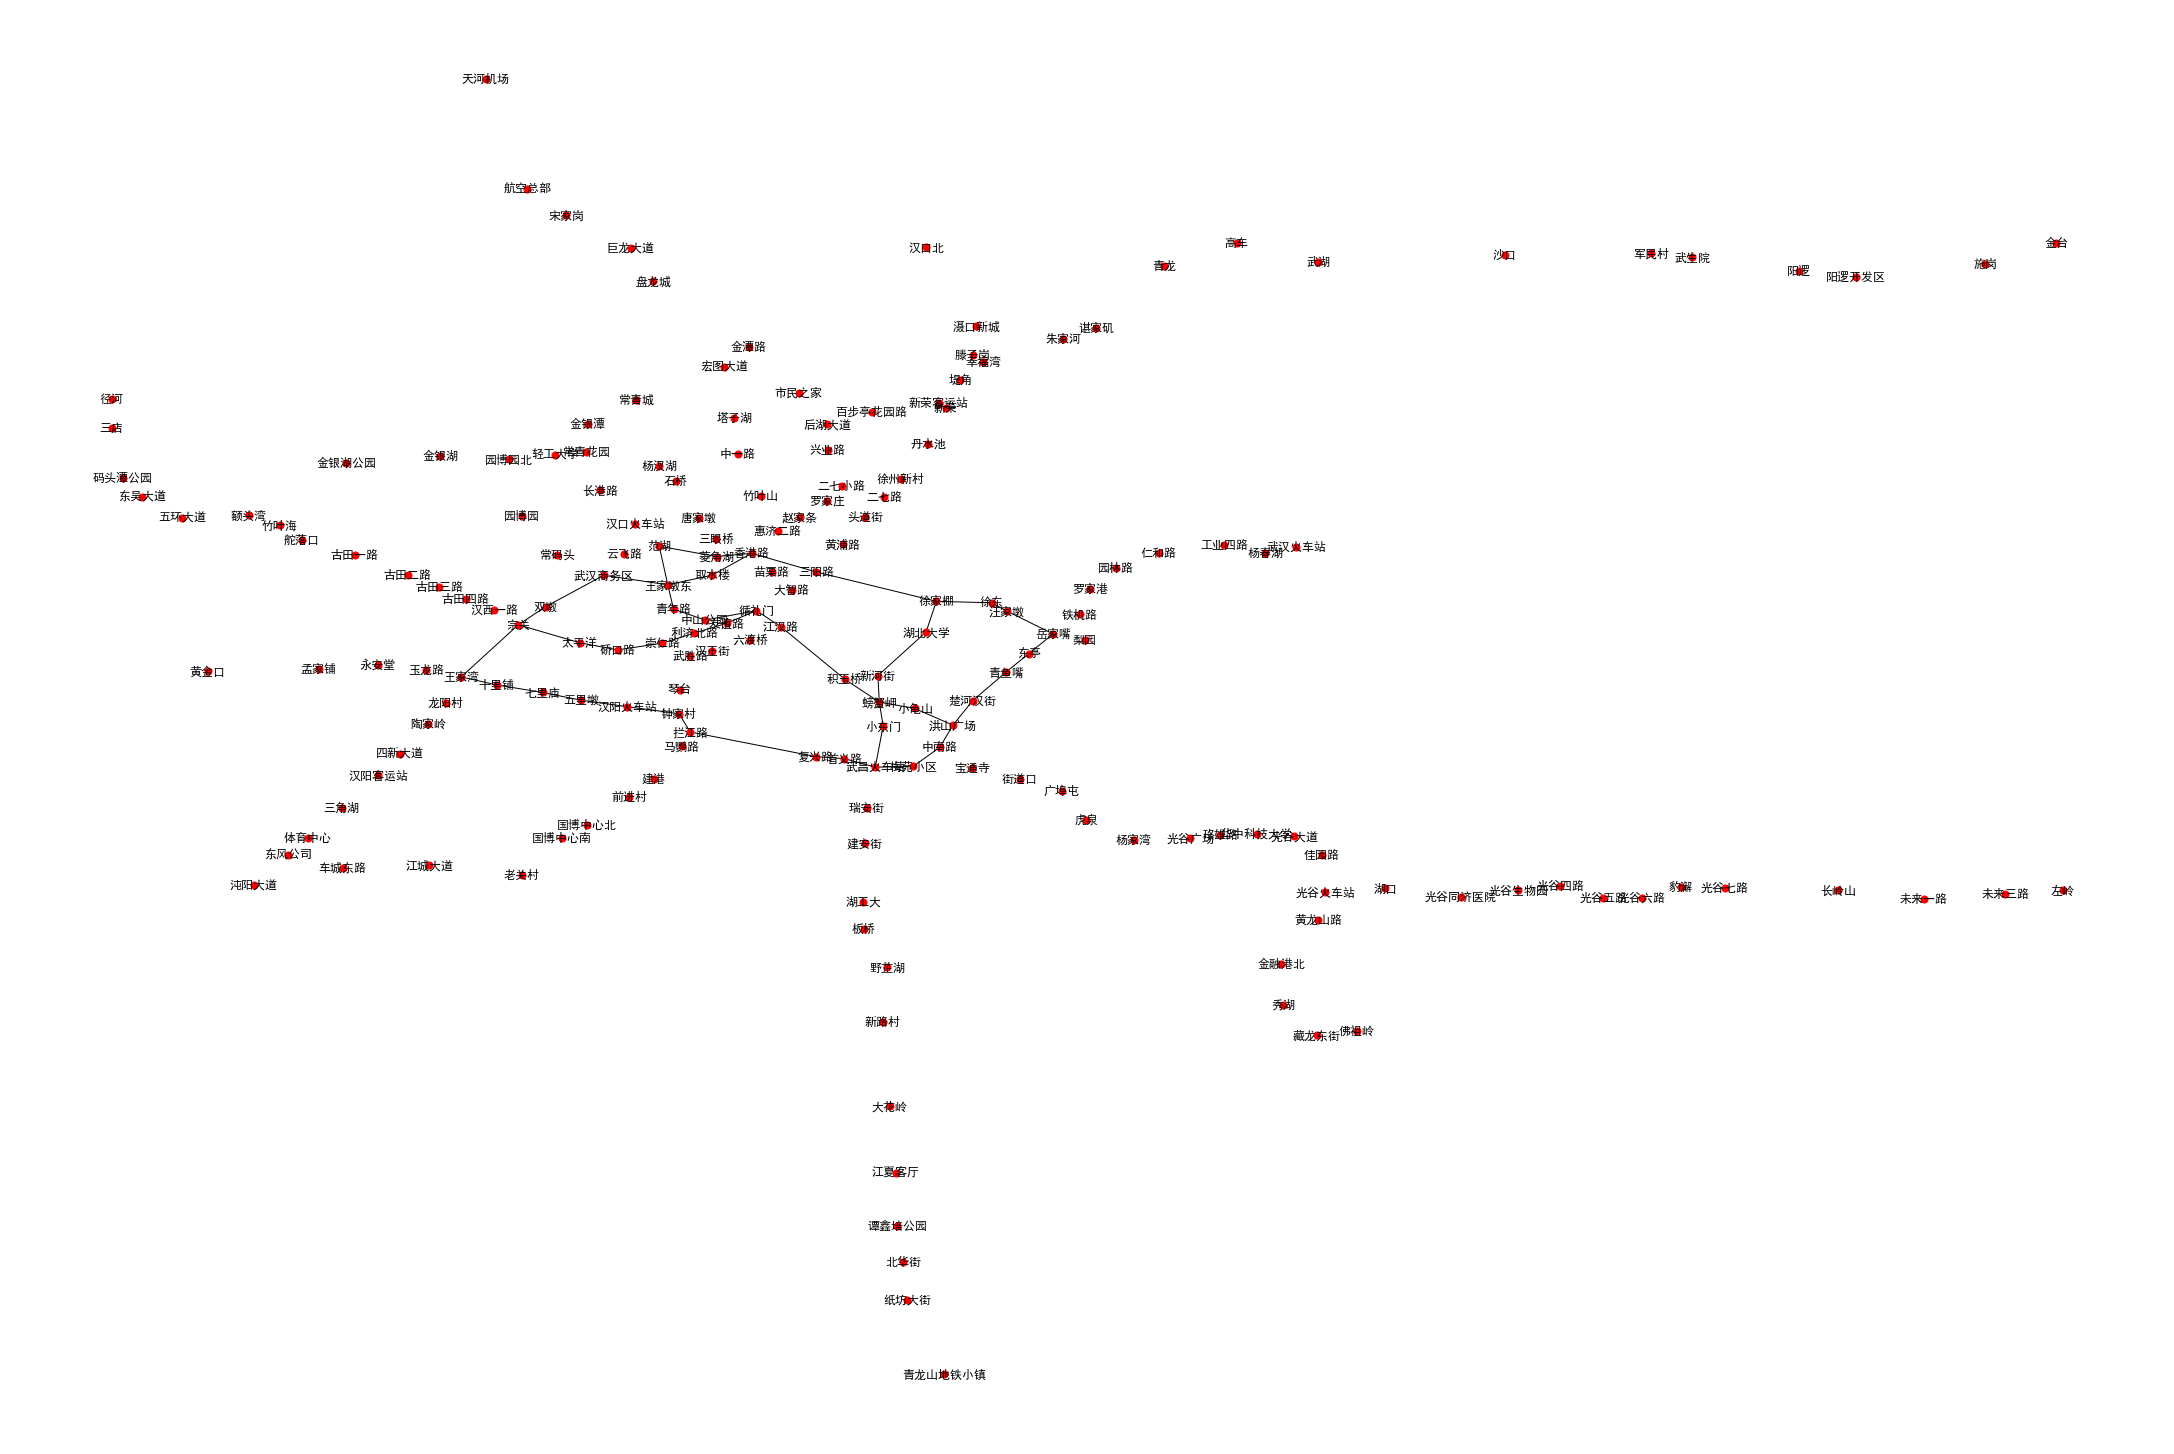

In [156]:
nx.draw(stop_graph,
        stop_location,
        with_labels=True,
        node_size=50,
        font_size=12,
        node_color='red')

In [127]:
def search3(start, destination):
    pathes = []
    explored = set()
    frontier = [[start]]
    while frontier:
        path = frontier.pop(0)
        s = path[-1]
        for next in next_stops[s]:
            if next not in explored:
                # explored.add(next) 如果此时将目的地加入 explored，其它可能的路径都被忽略了
                path2 = path + [next]
                if next == destination:
                    return path2
                else:
                    frontier.append(path2)
        explored.add(s)
    return []

In [128]:
search3('宗关', '螃蟹岬')

['宗关', '双墩', '武汉商务区', '王家墩东', '青年路', '中山公园', '循礼门', '江汉路', '积玉桥', '螃蟹岬']

In [147]:
def search4(start, destination, by_way):
    start = start
    path = []
    by_way.append(destination)
    while by_way:
        next = by_way.pop(0)
        if next in path:
            continue
        try:
            path.pop()
        except IndexError:
            pass
        finally:
            path += search3(start, next)
            start = next
    return path

In [148]:
search4('宗关', '螃蟹岬', by_way=['三阳路'])

['宗关', '双墩', '武汉商务区', '王家墩东', '取水楼', '香港路', '三阳路', '徐家棚', '湖北大学', '新河街', '螃蟹岬']

In [149]:
search4('宗关', '螃蟹岬', by_way=['三阳路', '汉阳火车站', '武昌火车站'])

['宗关',
 '双墩',
 '武汉商务区',
 '王家墩东',
 '取水楼',
 '香港路',
 '三阳路',
 '大智路',
 '江汉路',
 '六渡桥',
 '汉正街',
 '武胜路',
 '琴台',
 '钟家村',
 '汉阳火车站',
 '钟家村',
 '拦江路',
 '复兴路',
 '首义路',
 '武昌火车站',
 '小东门',
 '螃蟹岬']

In [150]:
search3('王家湾', '钟家村')

['王家湾', '十里铺', '七里庙', '五里墩', '汉阳火车站', '钟家村']

In [151]:
search4('王家湾', '钟家村', by_way=['崇仁路'])

['王家湾',
 '宗关',
 '太平洋',
 '硚口路',
 '崇仁路',
 '利济北路',
 '友谊路',
 '循礼门',
 '江汉路',
 '六渡桥',
 '汉正街',
 '武胜路',
 '琴台',
 '钟家村']

### 搜索问题
任意的搜索问题都可以转化成一颗决策树，都可以抽象为:
- The start state：初始状态，搜索的起点
- The goal state：截止状态，搜索的目标
- The successors：每个状态的后续或候选状态集合
- The strategy that determines the order in which we search：对候选状态集合进行排序，优先扩展排序高的状态。例如围棋中候选状态量级超级大，需要策略进行剪枝。
    
常用的搜索算法：    
- 深度优先搜索
- 广度优先搜索
- 启发式(heuristic)搜索
- A* 搜索
- 动态规划


#### 动态规划求解 Travelling Sales man Problem 问题
- 旅行商问题：给定一系列城市和每对城市之间的距离，求解访问每一座城市一次并回到起始城市的最短回路。
- 本例是给定起点，遍历所有点的最短路径，不必返回原始起点

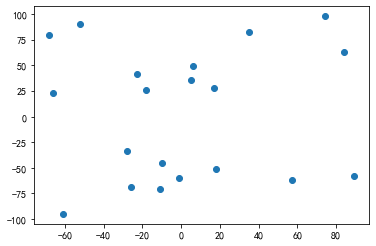

In [6]:
# 一系列点
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] =False

import random
import matplotlib.pyplot as plt
import numpy as np

latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
plt.scatter(latitudes, longitude)

In [7]:
# 点间距离

import math


def distance(x1, x2):
    return math.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)


x1 = [0, 0]
x2 = [3, 4]
distance(x1, x2)

5.0

In [8]:
# 距离矩阵
def distance_matrix(arr):
    return [[distance(x1, x2) for x1 in arr] for x2 in arr]


distance_matrix([x1, x2])

[[0.0, 5.0], [5.0, 0.0]]

最短路径-----自顶向下，**递归**
1. 起始点和待遍历点中某一点的距离，剩下所有点的最短路径，计算两者之和
2. 遍历所有点，重复 1 中的计算
3. 从 2 的结果中选择最小值

In [11]:
def rec_TSP(start, arr):
    result = {'dist': float('inf'), 'path': []}

    if len(arr) == 1:
        result['dist'] = distance(start, arr[0])
        result['path'] = [start, arr[0]]

    for i in range(len(arr)):
        next_ = rec_TSP(arr[i], arr[:i] + arr[i + 1:])
        if distance(start, arr[i]) + next_['dist'] < result['dist']:
            result['dist'] = distance(start, arr[i]) + next_['dist']
            result['path'] = [start] + next_['path']

    return result


arr = list(zip(latitudes[:10], longitude[:10]))
start = (1, 1)
solution = rec_TSP(start, arr)

solution

{'dist': 570.8714380838348,
 'path': [(1, 1),
  (-18, 26),
  (-66, 23),
  (-68, 80),
  (5, 36),
  (17, 28),
  (84, 63),
  (57, -62),
  (18, -51),
  (-11, -71),
  (-61, -95)]}

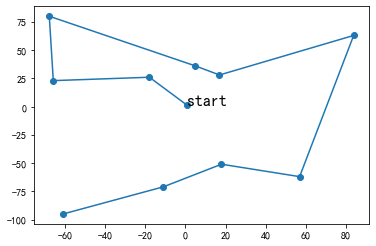

In [12]:
# 可视化路径
def plot_path(path, **kwargs):
    x = [p[0] for p in path]
    y = [p[1] for p in path]
    plt.plot(x, y, marker='o')
    start = path[0]
    plt.text(*start, 'start', fontsize=16)


plot_path(solution['path'])

最短路径——自底向上，**动态规划**

1. 点集 $S\{0,1,2...n-1\}$，起点为 0；
2. 所求问题表示为 $dp(S)$，辅助表达式 $C(i,S)$表示点 $i$ 为终点时的最短路径，点 0 和 i 都包含在集合S中
3. $dp(S)=min( C(i,S),i\in S )$
4. $T(i,S)=min( C(j,S-{j}) + distance(i,j),j\in S )$,$j$ 表示路径中倒数第二个点
5. $S$ 的所有子集可以通过 $2^n$ 个整数的比特数表达，比特数每一位0或1表示该位元素存在与否。如 $bin(20)=10100$，表示集合 ${2，4}$

In [13]:
def dp_TSP(cities, M):
    n = len(cities)
    T = [[(float('inf'), '')] * (1 << n) for _ in range(n)]
    # T[i][k] = C(i,k), 表示 k 对应的点子集， i 表示终点时的最短路径

    T[0][1] = 0, '0'
    # C(0, {0}) 表示只有起点, 路径为空

    for s in range(1 << n):
        if sum(((s >> j) & 1) for j in range(n)) <= 1 or not (s & 1):
            # x & 1 表示 x 的比特数的最后一位
            # s >> j 表示 s 的比特数右移 j 位，即删除后 j 位
            # (s >> j) & 1) for j in range(n) 表示 s 的比特数的每一位
            # s 代表的集合必须含有2个及以上元素
            # s & 1：s 比特位最后一位为 1， 即所代表的集合必须含有起点 0
            continue

        for i in range(1, n):
            if not ((s >> i) & 1):
                # 元素 i 不在 s 表示的集合内
                continue
            for j in range(n):
                if j == i or not ((s >> j) & 1):
                    # 元素 j 不能等于 i， 且必须包含在集合 s 中
                    continue

                T[i][s] = min(T[i][s],
                              (T[j][s ^ (1 << i)][0] + M[i][j],
                               T[j][s ^ (1 << i)][1] + '->{}'.format(i)))
    return min(T[i][(1 << n) - 1] for i in range(1, n))


def parse_path(path, cities):
    return [cities[int(s)] for s in path.split('->')]


def solve_TSP(cities):
    M = distance_matrix(cities)
    min_dist, best_path = dp_TSP(cities, M)
    cities_by_order = parse_path(best_path, cities)
    print('最短距离： ', min_dist)
    print('最优路径： ', best_path)
    return min_dist, cities_by_order

最短距离：  732.2043148927471
最优路径：  0->1->7->15->18->17->6->9->3->10->8->11->2->19->13->5->14->12->16->4


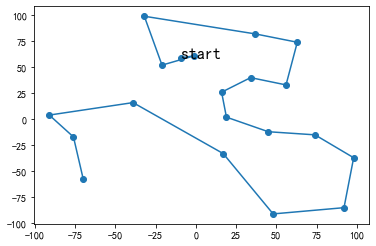

In [14]:
cities = [random.sample(range(-99, 100), 2) for x in range(20)]
min_dist, cities_by_order = solve_TSP(cities)
plot_path(cities_by_order)

多个起点时，该问题只有求得近似最优；先根据与这 $n$ 个起点的距离远近将点划分成 $n $ 份，然后各自遍历；也可以使用更复杂的方法，如聚类，将点积划分

In [15]:
def clf(starts, data):
    M = np.zeros((len(starts), len(data)))
    n, m = M.shape
    for i in range(n):
        for j in range(m):
            M[i, j] = distance(starts[i], data[j])
    return np.argmin(M, axis=0)

In [16]:
def regroup(starts, cities):
    target = clf(starts, cities)
    results = [[p] for p in starts]

    for i in range(len(starts)):
        group_i = [cities[j] for j in range(len(cities)) if target[j] == i]
        results[i].extend(group_i)

    return results

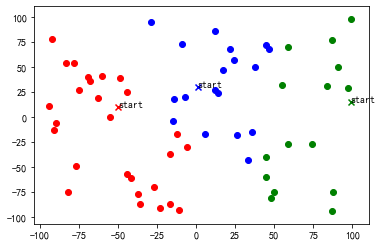

In [17]:
def plot_groups(starts, cities):
    colors = 'rbgyp'
    groups = regroup(starts, cities)
    for i in range(len(groups)):
        group = groups[i]
        x = [p[0] for p in group]
        y = [p[1] for p in group]
        plt.scatter(x[1:], y[1:], marker='o', color=colors[i])
        plt.scatter(x[0], y[0], marker='x', color=colors[i])
        plt.text(*starts[i], 'start')


cities = [random.sample(range(-99, 100), 2) for x in range(60)]
starts = [[-50, 10], [1, 30], [99, 15]]
plot_groups(starts, cities)
plt.show()

In [18]:
def solve_kTSP(starts, cities):
    groups = regroup(starts, cities)
    results = []
    for i in range(len(groups)):
        print('{}组{}点: '.format(i + 1, len(groups[i])), groups[i])

        M = distance_matrix(groups[i])
        min_dist, best_path = dp_TSP(groups[i], M)
        cities_by_order = parse_path(best_path, groups[i])
        print('最短距离： ', min_dist)
        print('最优路径： ', best_path)
        results.append((min_dist, cities_by_order))
    return results

1组20点:  [[-50, 10], [8, -71], [-50, 32], [-45, 22], [-42, 51], [-53, -33], [-53, 84], [-75, -37], [-55, -87], [-41, -97], [11, -72], [-90, 68], [-71, -50], [-89, 17], [-53, 16], [-25, -61], [-52, 39], [-31, -78], [-2, -70], [-4, -62]]
最短距离：  413.9659033112304
最优路径：  0->14->3->2->16->4->6->11->13->5->7->12->8->9->17->15->19->18->1->10
2组18点:  [[1, 30], [48, 95], [17, 90], [-7, 49], [-24, 44], [6, 39], [-1, -28], [37, 65], [-15, 23], [-12, 25], [-21, 74], [23, -32], [10, 76], [-24, 91], [34, -5], [23, 39], [50, 56], [45, 99]]
最短距离：  388.9235576449279
最优路径：  0->5->9->8->4->3->10->13->12->2->17->1->7->16->15->14->11->6
3组5点:  [[99, 15], [79, -23], [48, -3], [47, -80], [89, 24]]
最短距离：  164.80529635461832
最优路径：  0->4->2->1->3


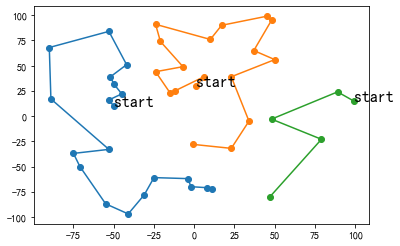

In [19]:
cities = [random.sample(range(-99, 100), 2) for x in range(40)]
starts = [[-50, 10], [1, 30], [99, 15]]

results = solve_kTSP(starts, cities)

colors = 'rbgyp'
for i in range(len(starts)):
    min_dist, cities_by_order = results[i]
    plot_path(cities_by_order, color=colors[i])
plt.show()